<a href="https://colab.research.google.com/github/saivishwanathgoud/MachineLearning/blob/master/Advanced_Statistics%2C_PCA_%26_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Statistics Group Assignment - Group 3

## Problem 1:

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import levene
from statsmodels.formula.api import ols   
from statsmodels.stats.anova import _get_covariance,anova_lm 
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

%matplotlib inline

Reading the Fever dataset

In [ ]:
df = pd.read_csv("Fever.csv")

Checking the first few values in dataset

In [ ]:
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In the Fever dataset, 
    The first variable A is amount of this A active ingredient in the compound.
    The second variable B is amount of this B active ingredient in the compound.
    The third variable is the Volunteer assigned to the treatment.
    The fourth variable is Relief in hours.

Checking the data types for variables in dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


Relief is continuous, while the remaining variables are discrete.

Checking for statistics of variables in the data set

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
B,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
Volunteer,36.0,2.500000,1.133893,1.0,1.750,2.5,3.250,4.0
Relief,36.0,7.183333,3.272090,2.3,4.675,6.0,9.325,13.5


The dataset contains 36 observations

Checking for number of categories in variable A, B & Volunteers

In [ ]:
df.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [ ]:
df.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [ ]:
df.Volunteer.value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

In [ ]:
df['A'].unique()

array([1, 2, 3], dtype=int64)

In [ ]:
df['B'].unique()

array([1, 2, 3], dtype=int64)

In [ ]:
df['Volunteer'].unique()

array([1, 2, 3, 4], dtype=int64)

The amounts of the two active ingredients (A & B) in the compound are varied at three levels each. Also, four volunteers are assigned to each of the nine treatments.

Checking for null values in the dataset

In [ ]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

There are no null values in the dataset.

Since the number of categories in A & B are three it is desirable to perform ANOVA.

Check the assumptions to see if ANOVA supports the Fever dataset

Assumption 1: For each category of variable A & B in the dataset, there should be a normal distribution. We draw a histogram for each category in A & B.

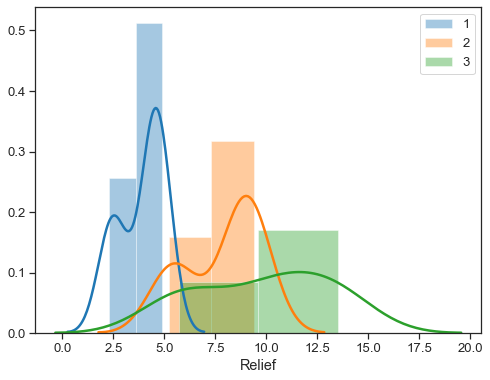

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.distplot(df.loc[df['A'] == 1]['Relief'],label= 1)
sns.distplot(df.loc[df['A'] == 2]['Relief'],label= 2)
sns.distplot(df.loc[df['A'] == 3]['Relief'],label= 3)
plt.legend()
plt.show()

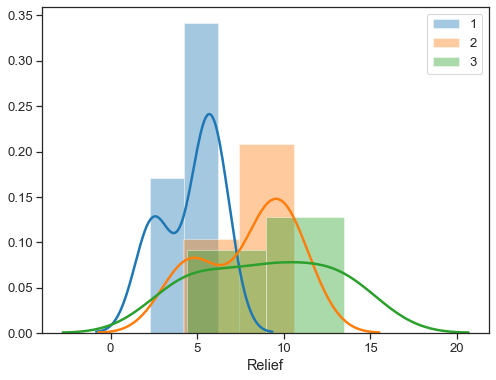

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.distplot(df.loc[df['B'] == 1]['Relief'], label = 1)
sns.distplot(df.loc[df['B'] == 2]['Relief'], label = 2)
sns.distplot(df.loc[df['B'] == 3]['Relief'], label = 3)
plt.legend()
plt.show()

From the histogram, each of the groups do not appear to be normal, however between the group variability seems quite less compared to the variability within the A & B groups, therefore ANOVA is the right tool.

Let us perform the Shapiro's test. Shapiro's test gives 2 statistics, w-value & p-value.
The null hypothesis for Shapiro's test, H0: Data is normally distributed ; H1: Data is not normally distributed.

In [ ]:
import scipy.stats as stat

In [ ]:
a = stat.shapiro(df.loc[df['A']==1]['Relief'])
b = stat.shapiro(df.loc[df['A']==2]['Relief'])
c = stat.shapiro(df.loc[df['A']==3]['Relief'])
display(a,b,c)

ShapiroResult(statistic=0.7686298489570618, pvalue=0.004211849067360163)

ShapiroResult(statistic=0.7287067770957947, pvalue=0.0016160557279363275)

ShapiroResult(statistic=0.8479959964752197, pvalue=0.034682635217905045)

In [ ]:
d = stat.shapiro(df.loc[df['B']==1]['Relief'])
e = stat.shapiro(df.loc[df['B']==2]['Relief'])
f = stat.shapiro(df.loc[df['B']==3]['Relief'])
display(d,e,f)

ShapiroResult(statistic=0.765633761882782, pvalue=0.00391089404001832)

ShapiroResult(statistic=0.8065383434295654, pvalue=0.01112875435501337)

ShapiroResult(statistic=0.8446834087371826, pvalue=0.031581729650497437)

For all the three categories in A & B, the p-value is less than 0.05 indicating that data does not pass the first assumption.

Assumption 2: The variables under consideration should have categories which are independent of each other. There should not be a high correlation between the data from different categories. We use pearsonr to calculate the correlation between Relief hours and quantities of A & B.
In the correlation output we get two values: 1. value of correlation, represented by r (lies between 0 & 1) & 2. significance of correlation

In [ ]:
g=df.loc[df['A']==1]['Relief']
h=df.loc[df['A']==2]['Relief']
i=df.loc[df['A']==3]['Relief']

In [ ]:
stat.pearsonr(g,h)

(0.9643841822233825, 4.251178170066627e-07)

In [ ]:
stat.pearsonr(h,i)

(0.9209168566985193, 2.1308376762661722e-05)

In [ ]:
stat.pearsonr(g,i)

(0.8907278987226017, 0.00010186302063719684)

In [ ]:
j=df.loc[df['B']==1]['Relief']
k=df.loc[df['B']==2]['Relief']
l=df.loc[df['B']==3]['Relief']

In [ ]:
stat.pearsonr(j,k)

(0.9749937778452632, 7.38421258145445e-08)

In [ ]:
stat.pearsonr(k,l)

(0.9587493733236578, 8.776237410164263e-07)

In [ ]:
stat.pearsonr(j,l)

(0.9280894838922937, 1.3410273045728279e-05)

There is strong correlation between relief hours for different categories of A & B.

Assumption 3: Homogenity of variance - For homegenity of variance to happen the spread of data around the mean for each category should not have a significant difference and data is said to be homoscedastic. We perform the Levene test for this assumption. The hypothesis for this test, H0 = There is homogenity of variance; H1 = There is no homogenity of variance.

In [ ]:
stat.levene(g,h,i)

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)

In [ ]:
stat.levene(j,k,l)

LeveneResult(statistic=2.941356517208818, pvalue=0.06675699295483081)

We reject the null hypothesis for A stating there is no homogenity of variance for A(since p-value is less than 0.05). We accept the null hypothesis for B stating that there is homogenity of variance for B(since p-value is greater that 0.05).

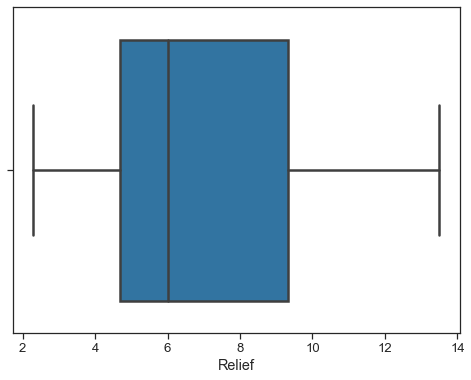

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.boxplot(df["Relief"]);

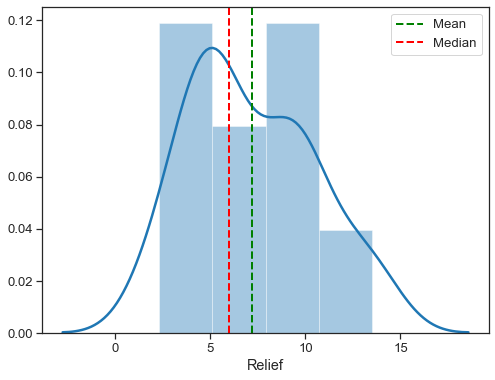

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.distplot(df["Relief"])
plt.axvline(df["Relief"].mean(), linestyle='dashed', linewidth=2,c="g",label="Mean")
plt.axvline(df["Relief"].median(), linestyle='dashed', linewidth=2,c="r",label="Median")
plt.legend()
plt.show()

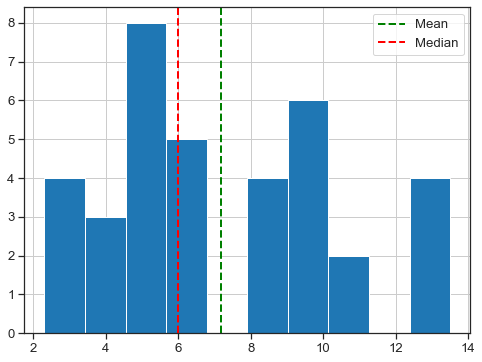

In [ ]:
ax = plt.subplots(figsize = (8,6))
df["Relief"].hist()
plt.axvline(df["Relief"].mean(), linestyle='dashed', linewidth=2,c="g",label="Mean")
plt.axvline(df["Relief"].median(), linestyle='dashed', linewidth=2,c="r",label="Median")
plt.legend()
plt.show()

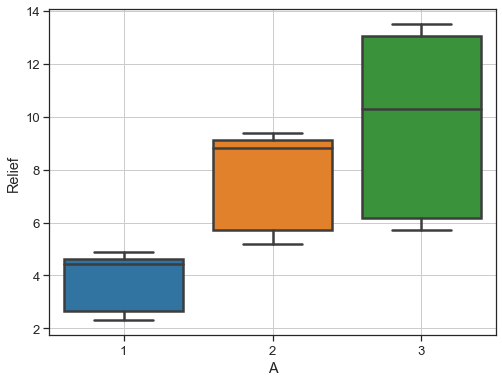

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.boxplot(x=df['A'],y=df['Relief'])
plt.grid();

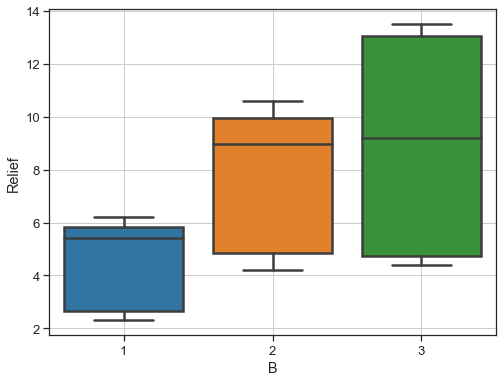

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.boxplot(x=df['B'],y=df['Relief'])
plt.grid();

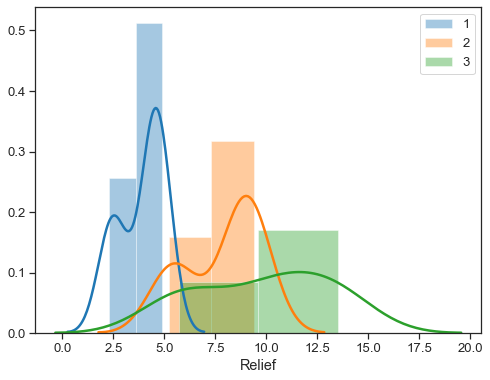

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.distplot(df.loc[df['A'] == 1]['Relief'], label = 1)
sns.distplot(df.loc[df['A'] == 2]['Relief'], label = 2)
sns.distplot(df.loc[df['A'] == 3]['Relief'], label = 3);
plt.legend()
plt.show()

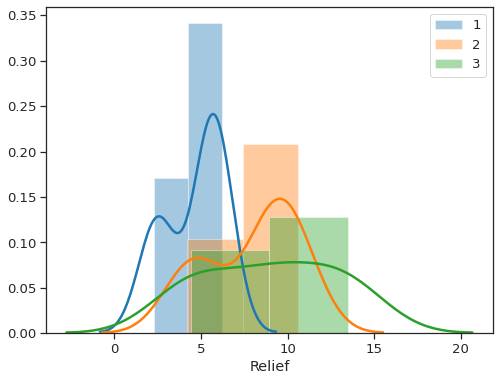

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.distplot(df.loc[df['B'] == 1]['Relief'], label = 1)
sns.distplot(df.loc[df['B'] == 2]['Relief'], label = 2)
sns.distplot(df.loc[df['B'] == 3]['Relief'], label = 3);
plt.legend()
plt.show()

Between the group variability seems quite less compared to the variability within the A & B groups, therefore ANOVA is the right tool.

### 1.1 Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

Variable A -

Null Hypothesis (H0) states that there no significant difference in the mean Relief hours for all categories of amounts of A ingredient. In other words, mean Relief hours for all categories of amounts of A ingredient are equal.

H0: 𝜇A1 = 𝜇A2 = 𝜇A3

Altrenative Hypothesis (H1) there is significant difference in the mean Relief hours for all categories of amounts of A ingredient. In other words, mean Relief hours for at least one category of amount of A ingredient are unequal.

H1: 𝜇A1  ≠ 𝜇A2 = 𝜇A3 or 𝐻1: 𝜇A1 = 𝜇A2 ≠ 𝜇A3 or 𝐻1: 𝜇A1 = 𝜇A3 ≠ 𝜇A2 or 𝐻1: 𝜇A1 ≠ 𝜇A2 ≠ 𝜇A3


Variable B -

Null Hypothesis (H0) states that there no significant difference in the mean Relief hours for all categories of amounts of B ingredient. In other words, mean Relief hours for all categories of amounts of B ingredient are equal.

H0: 𝜇B1 = 𝜇B2 = 𝜇B3

Altrenative Hypothesis (H1) there is significant difference in the mean Relief hours for all categories of amounts of B ingredient. In other words, mean Relief hours for at least one category of amount of B ingredient are unequal.

H1: 𝜇B1  ≠ 𝜇B2 = 𝜇B3 or 𝐻1: 𝜇B1 = 𝜇B2 ≠ 𝜇B3 or 𝐻1: 𝜇B1 = 𝜇B3 ≠ 𝜇B2 or 𝐻1: 𝜇B1 ≠ 𝜇B2 ≠ 𝜇B3


### 1.2 One-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’.

The data types for all indipendent variables are changed to categorical.

In [ ]:
df['A']=pd.Categorical(df['A'])
df['B']=pd.Categorical(df['B'])
df['Volunteer']=pd.Categorical(df['Volunteer'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null category
B            36 non-null category
Volunteer    36 non-null category
Relief       36 non-null float64
dtypes: category(3), float64(1)
memory usage: 924.0 bytes


In [ ]:
formula = 'Relief ~ C(A)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


$\textbf{Interpretation:}$
Since the p-value obtained from ANOVA for amount of ingredient A is less than $\alpha$ (0.05) we reject the null hypothesis H0 concluding that there is significant difference in the mean Relief hours for all categories of amounts of ingredient A.

In [ ]:
mc =MultiComparison(df['Relief'], df['A'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     3.95  0.001  1.7814 6.1186   True
     1      3     5.95  0.001  3.7814 8.1186   True
     2      3      2.0 0.0755 -0.1686 4.1686  False
---------------------------------------------------
[1 2 3]


We conducted the post hawke test - Tukey HSD concluding that within A the levels 2 & 3 did not have a significant effect on relief hours.

### 1.3 One-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’.

In [ ]:
formula = 'Relief ~ C(B)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


$\textbf{Interpretation:}$
Since the p-value obtained from ANOVA for amount of ingredient B is less than $\alpha$ (0.05) we reject the null hypothesis H0 concluding that there is significant difference in the mean Relief hours for all categories of amounts of ingredient B.

In [ ]:
mc =MultiComparison(df['Relief'], df['B'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      3.3 0.0164  0.5374 6.0626   True
     1      3     4.35 0.0014  1.5874 7.1126   True
     2      3     1.05 0.6164 -1.7126 3.8126  False
---------------------------------------------------
[1 2 3]


We conducted the post hawke test - Tukey HSD concluding that within B the levels 2 & 3 did not have a significant effect on relief hours.

### 1.4 Analysis of the effects of one variable on another with the help of an interaction plot. What is the interaction between the two treatments?


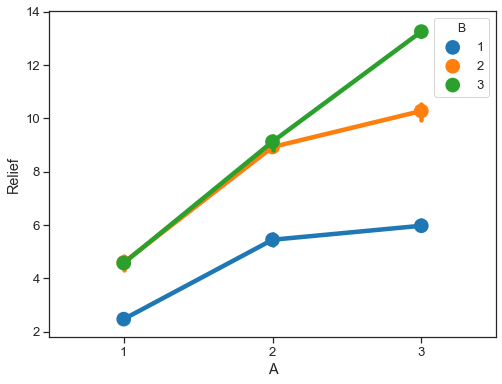

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.pointplot(x='A',y='Relief',hue='B',data=df)
plt.show()

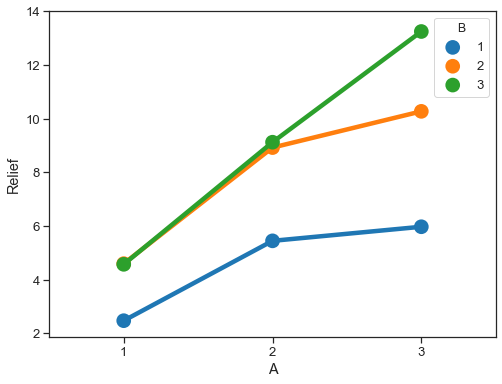

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.pointplot(x='A',y='Relief',hue='B',data=df,ci=None)
plt.show()

$\textbf{Interpretation:}$

a. The plot suggests that there is interaction between the levels of ingredient A and ingredient B because the distance between the means across the three levels are not the same.

b. As the lines are more unparallel, the strength of the interaction is even greater.

c. Further quantifying the interaction plot (difference of differences) - rate of relief is high for A3B3 (4) and A2B3 (2) which confirms an interaction here. We have a positive effect (assuming, level 3 to be highest) increasing the indipendent variables (A,B) increases the DV (Relief).

### 1.5 Two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief'.

H0:There is no interaction between the levels of ingredient A and ingredient B.
H1: The alternative hypothesis is that “there is interaction”.

In [ ]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


Without the interaction effect, for 2-way ANOVA p-value obtained is less than 𝛼. Meaning that the Relief hours across the ingredients A & B are not equal when considered separately.

In [ ]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


$\textbf{Interpretation:}$
The P-value obtained from ANOVA analysis for ingredients A & B are statistically significant (p value<0.05) and also the interaction effect is significant (p value <0.05). We conclude that amounts of ingredients A and B separately significantly affect the Relief hours outcome and also Interaction of amounts of ingredients A and B  significantly affects the Relief hours outcome.

Results:
a. The test statistic is F = 122.2 and the p.value is less than 0.05. Therefore, at the alpha level of 0.05, we reject the null hypothesis and conclude that there is significant interaction between the levels of ingredient A and ingredient B.

b. It is possible for the interaction to be significant when the main effects are not significant. So it makes sense to test the significance of the main effects.

c.  Ho for the main effect for A = Responses do not differ by the levels of factor A, while holding constant the levels of factor B and the interactions.
    Ho for the main effect for B = Responses do not differ by the levels of factor A, while holding constant the levels of factor A and the interactions.
    
The test statistics for the main effects A and B are F = 1827.9 and F = 1027.3, respectively. the p-values are less than 0.05 for each. We reject the null hypothesis and conclude that the responses significantly differ across the levels of the two ingredients, while holding constant the other and the interactions.

### 1.6 Business Implications

This is an experimental study on developing a new compound to assess the relief in hours in severe cases of hay fever conducted on 36 volunteers. There are 2 active ingredients (A&B) involved in the study and the compound varies at 3 levels (Low, Medium, High - Assumption based on relief hours). 

In order to assess the impact of relief with each ingredient A&B, we performed ANOVA analysis. The null hypothesis in both the ANOVA tests is that the active ingredient has no significant effect on relief. 
Assumptions were validated to conclude that ANOVA test is the right fit to perform analysis.

a. In both the ANOVA tests the p value is less than 0.05 proving that we can reject the null hypothesis and conclude that the relief is significantly affected by the levels of 2 active ingredients. 

b. All amount categories of ingredients A and B in the Hay Fever medicine compound are significant to be included in the clinical testing of the medicine and all analyses related to the same.

c. Observing the results of Tukey HSD/Post HOC test we can conclude that the categorization of 1,2,3 levels for the two active ingredients (A & B) are not proper and have to be adjusted.


## End of Problem 1

## Problem 2:

Importing the required libraries

In [ ]:
from pylab import rcParams
import statsmodels.api as sm

In [ ]:
data = pd.read_csv("Income.csv")

In [ ]:
data.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300


### 2.1 Exploratory Data Analysis

a. Data Types check for variables

In [ ]:
print(data.info(),'\n')
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
WorkingHoursWife       753 non-null int64
WifeAge                753 non-null int64
EducationWife          753 non-null int64
WifeHourEarnings       753 non-null float64
WifeWage               753 non-null float64
WorkingHoursHusband    753 non-null int64
HusbandAge             753 non-null int64
EducationHusband       753 non-null int64
HusbandWage            753 non-null float64
EducationWifeMother    753 non-null int64
EducationWifeFather    753 non-null int64
UnemploymentRate       753 non-null float64
WifeExperience         753 non-null int64
FamilyIncome           753 non-null int64
dtypes: float64(4), int64(10)
memory usage: 82.5 KB
None 

WorkingHoursWife         int64
WifeAge                  int64
EducationWife            int64
WifeHourEarnings       float64
WifeWage               float64
WorkingHoursHusband      int64
HusbandAge               int64
EducationHusband       

b. Null Values check

In [ ]:
data.isnull().sum()

WorkingHoursWife       0
WifeAge                0
EducationWife          0
WifeHourEarnings       0
WifeWage               0
WorkingHoursHusband    0
HusbandAge             0
EducationHusband       0
HusbandWage            0
EducationWifeMother    0
EducationWifeFather    0
UnemploymentRate       0
WifeExperience         0
FamilyIncome           0
dtype: int64

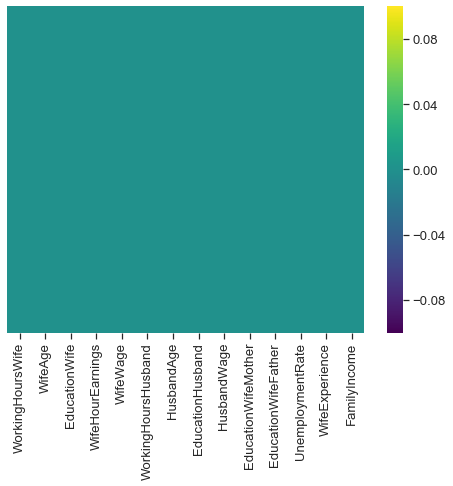

In [ ]:
ax = plt.subplots(figsize = (8,6))
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

c. Measures of Descriptive Statistics

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
WorkingHoursWife,753.0,740.576361,871.314216,0.0000,0.0000,288.0000,1516.0000,4950.000
WifeAge,753.0,42.537849,8.072574,30.0000,36.0000,43.0000,49.0000,60.000
EducationWife,753.0,12.286853,2.280246,5.0000,12.0000,12.0000,13.0000,17.000
WifeHourEarnings,753.0,2.374565,3.241829,0.0000,0.0000,1.6250,3.7879,25.000
WifeWage,753.0,1.849734,2.419887,0.0000,0.0000,0.0000,3.5800,9.980
WorkingHoursHusband,753.0,2267.270916,595.566649,175.0000,1928.0000,2164.0000,2553.0000,5010.000
HusbandAge,753.0,45.120850,8.058793,30.0000,38.0000,46.0000,52.0000,60.000
EducationHusband,753.0,12.491368,3.020804,3.0000,11.0000,12.0000,15.0000,17.000
HusbandWage,753.0,7.482179,4.230559,0.4121,4.7883,6.9758,9.1667,40.509
EducationWifeMother,753.0,9.250996,3.367468,0.0000,7.0000,10.0000,12.0000,17.000


d. Histogram for variables

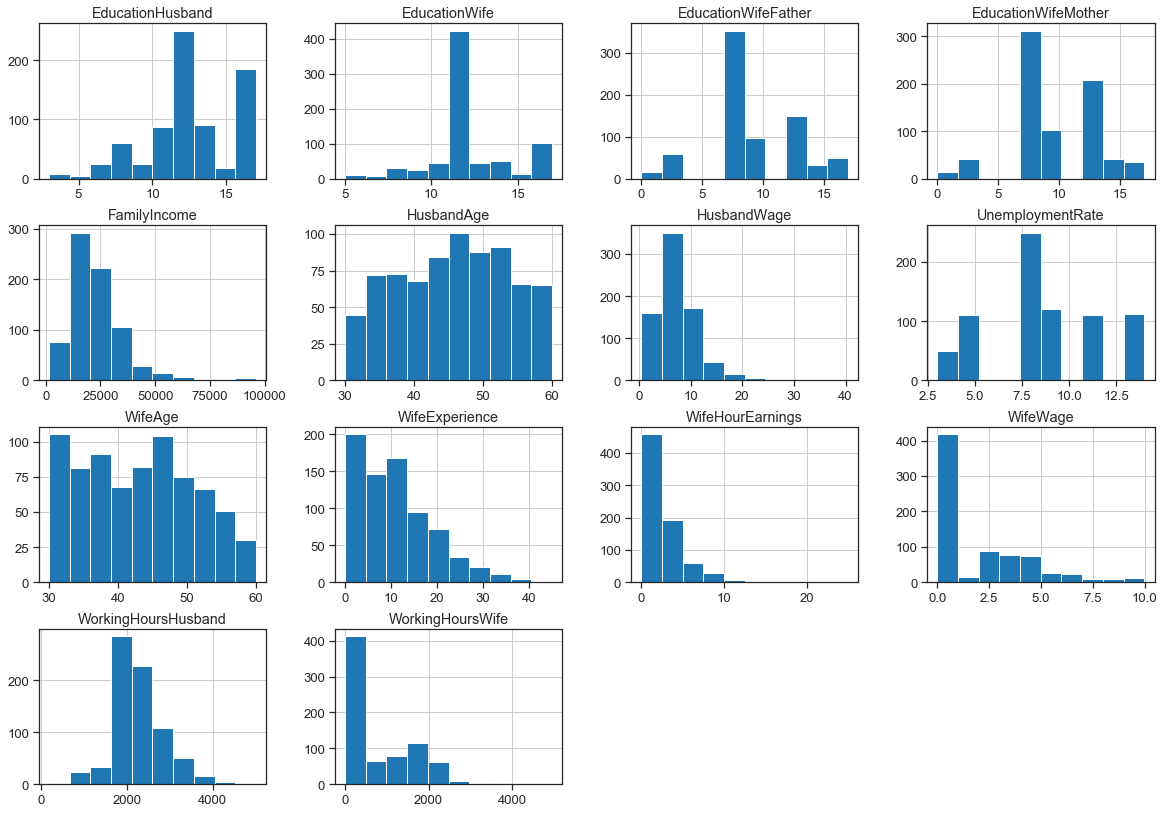

In [ ]:
rcParams['figure.figsize'] = 20, 14

data.hist();

e. Boxplot for variables

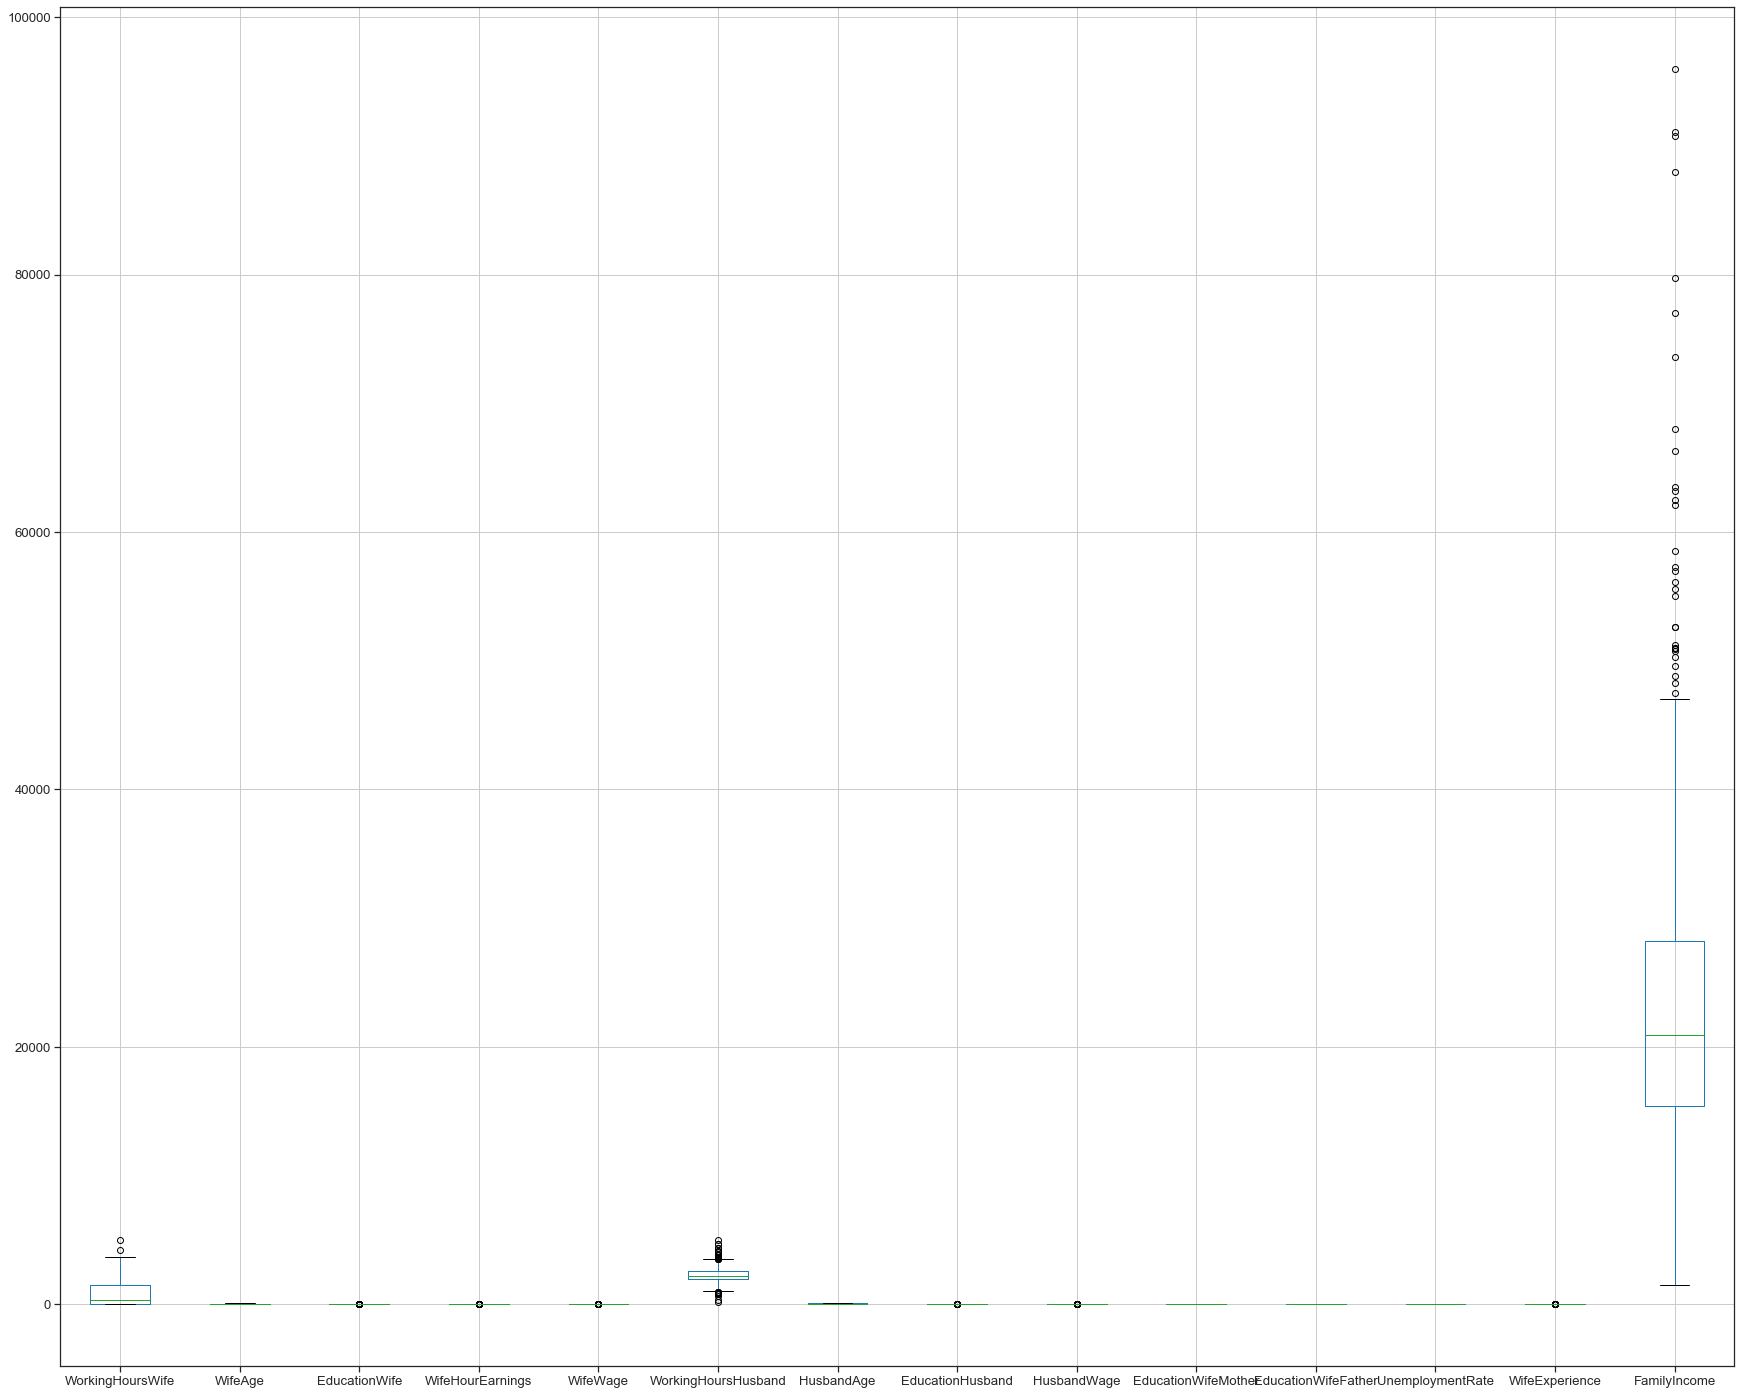

In [ ]:
plt.figure(figsize=(30,25))
data.boxplot();

1. Box Plot: Wife

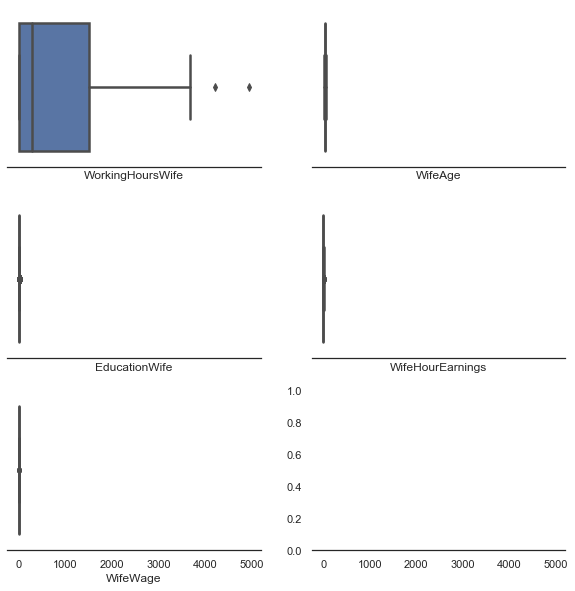

In [ ]:
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True)
sns.despine(left=True)
sns.set(style="whitegrid")
sns.boxplot(x= "WorkingHoursWife",data = data,linewidth=2.5,ax =axes[0,0])
sns.boxplot(x= "WifeAge",data = data,linewidth=2.5,ax =axes[0,1])
sns.boxplot(x= "EducationWife",data = data,linewidth=2.5,ax =axes[1,0])
sns.boxplot(x= "WifeHourEarnings",data = data,linewidth=2.5,ax =axes[1,1])
sns.boxplot(x= "WifeWage",data = data,linewidth=2.5,ax =axes[2,0])

2. Box Plot: Husband

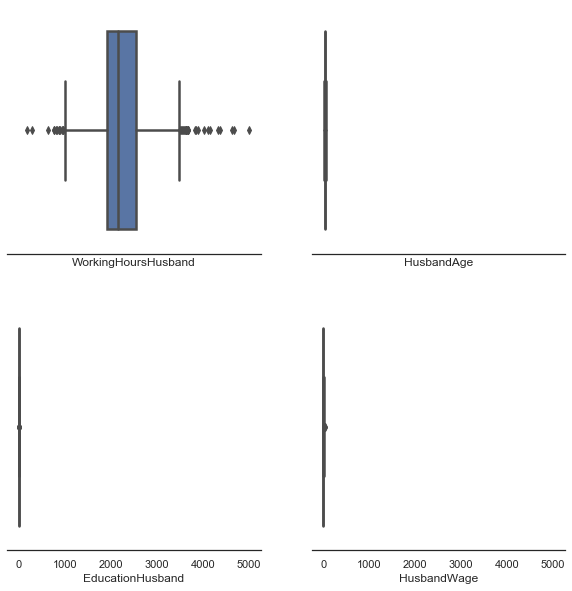

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)
sns.despine(left=True)
sns.set(style="whitegrid")
sns.boxplot(x= "WorkingHoursHusband",data = data,linewidth=2.5,ax =axes[0,0])
sns.boxplot(x= "HusbandAge",data = data,linewidth=2.5,ax =axes[0,1])
sns.boxplot(x= "EducationHusband",data = data,linewidth=2.5,ax =axes[1,0])
sns.boxplot(x= "HusbandWage",data = data,linewidth=2.5,ax =axes[1,1])

f. Dist Plot: Wife

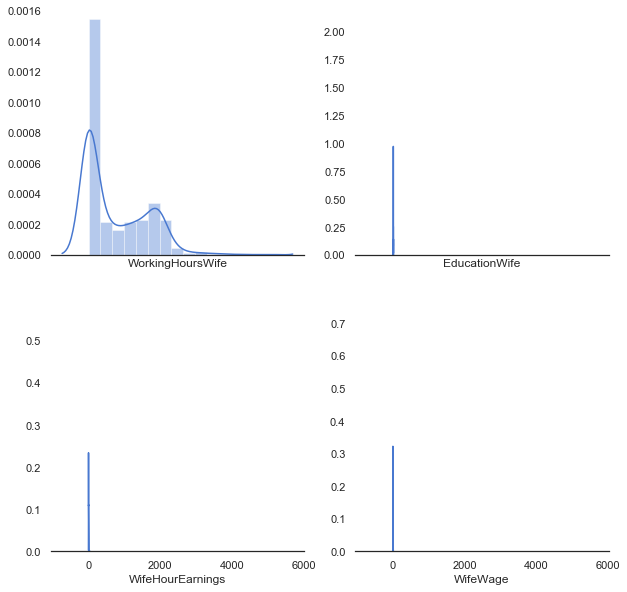

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)
sns.despine(left=True)
sns.distplot(data["WorkingHoursWife"],ax=axes[0, 0])
sns.distplot(data["EducationWife"],ax=axes[0, 1])
sns.distplot(data["WifeHourEarnings"], ax=axes[1, 0])
sns.distplot(data["WifeWage"],ax=axes[1, 1])

g. Dist Plot: Husband

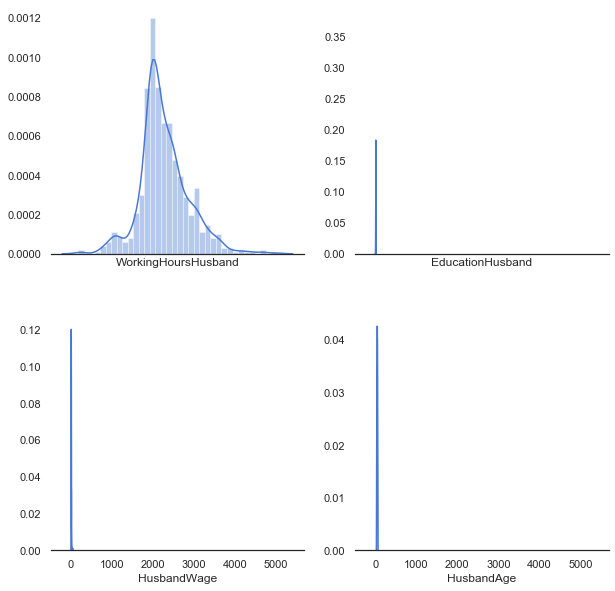

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)
sns.despine(left=True)
sns.distplot(data["WorkingHoursHusband"],ax=axes[0, 0])
sns.distplot(data["EducationHusband"],ax=axes[0, 1])
sns.distplot(data["HusbandWage"], ax=axes[1, 0])
sns.distplot(data["HusbandAge"],ax=axes[1, 1])

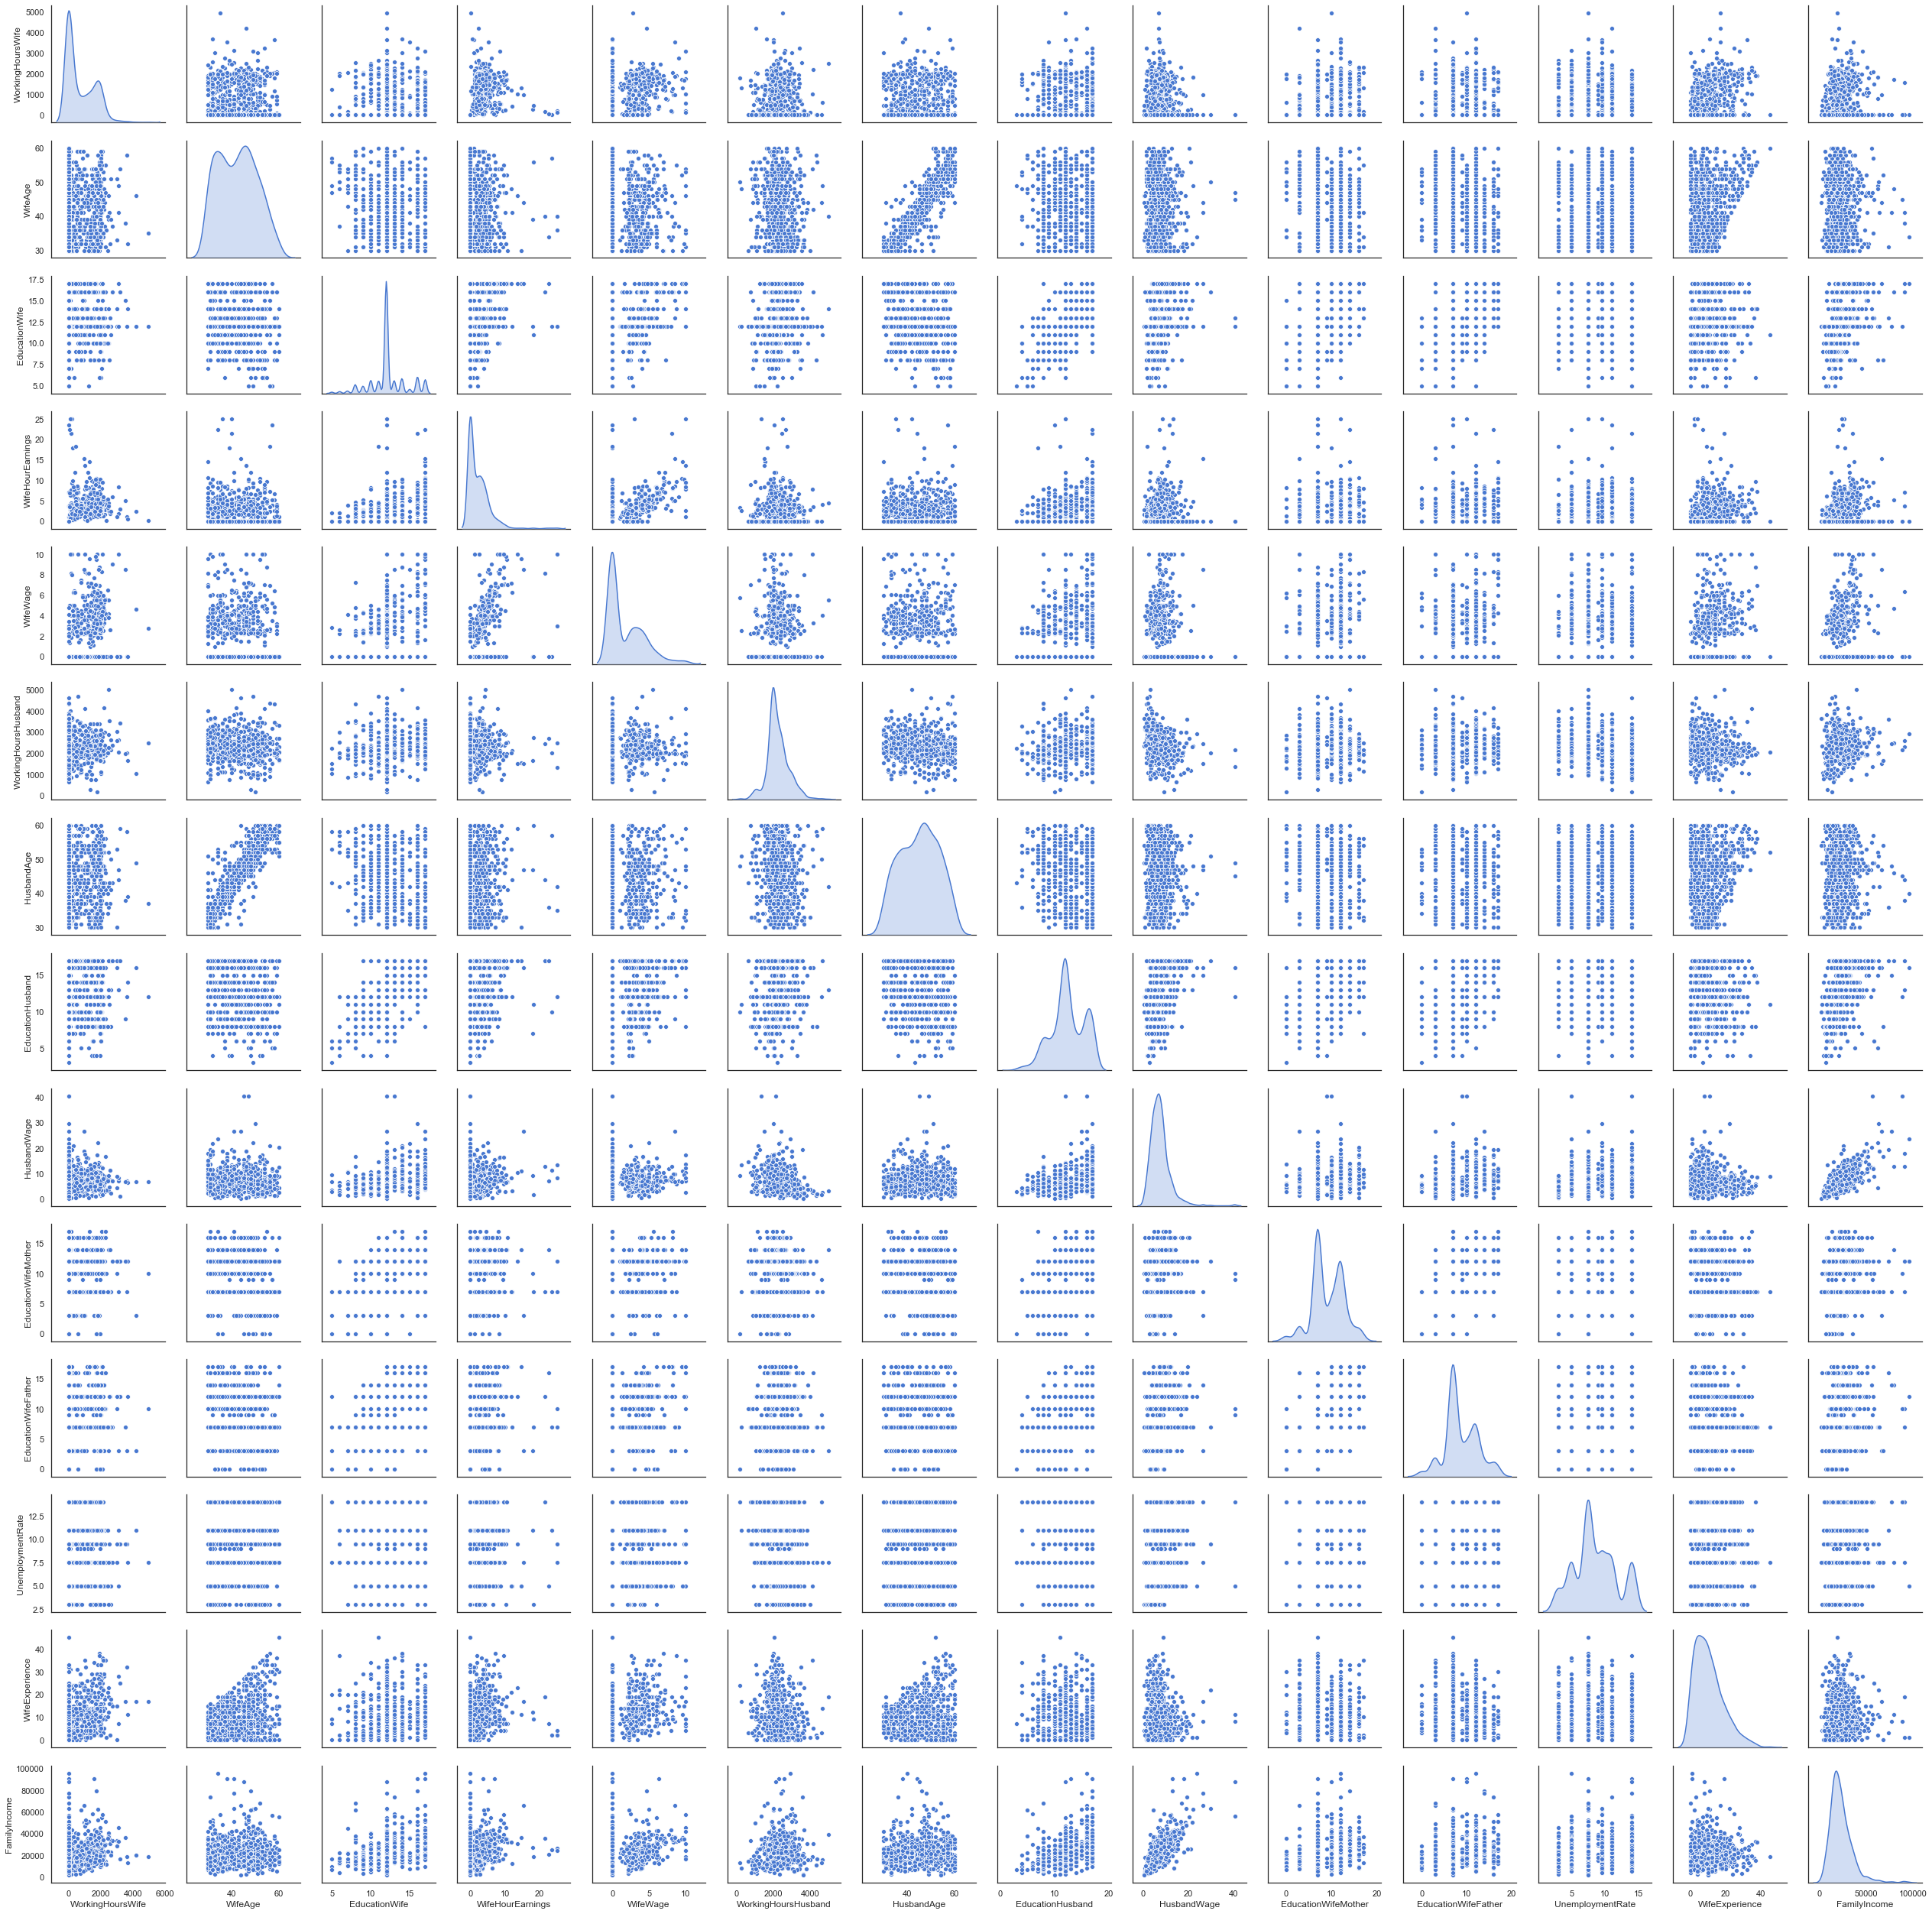

In [ ]:
sns.pairplot(data,diag_kind='kde');

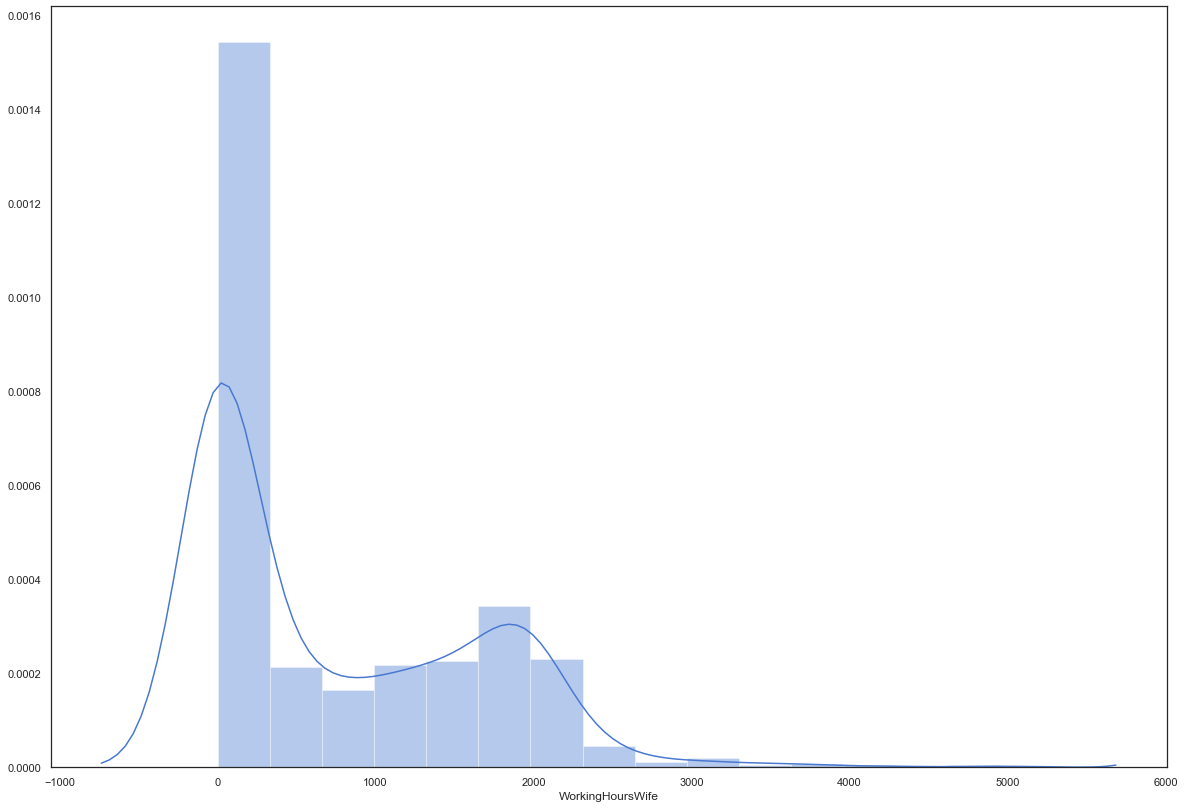

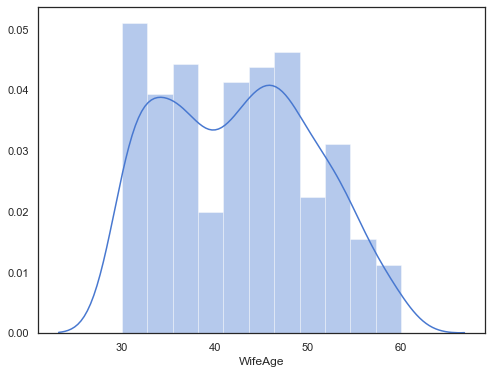

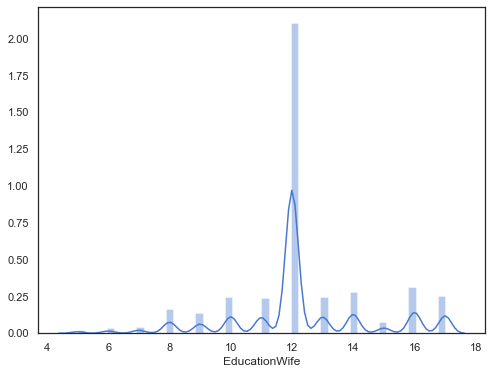

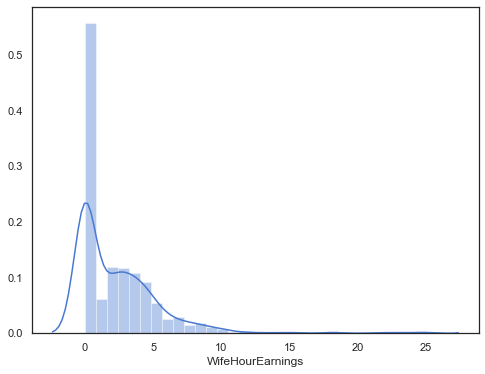

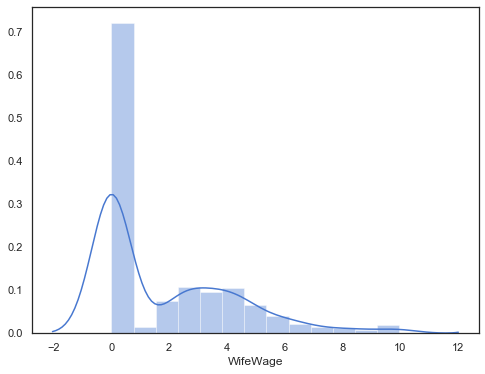

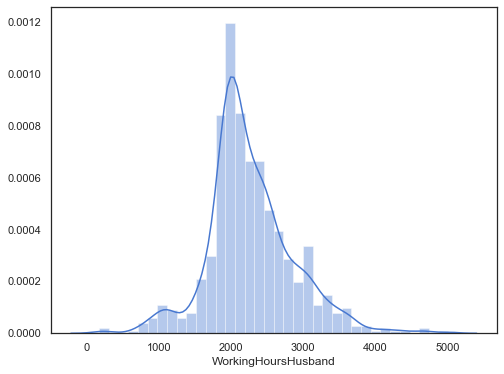

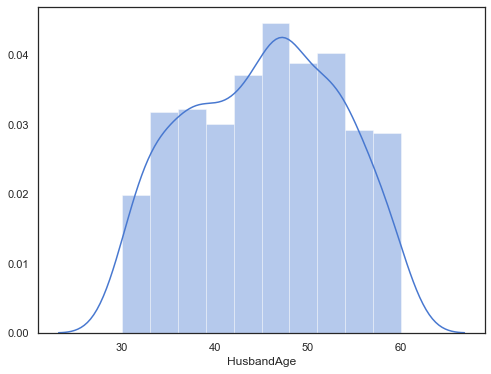

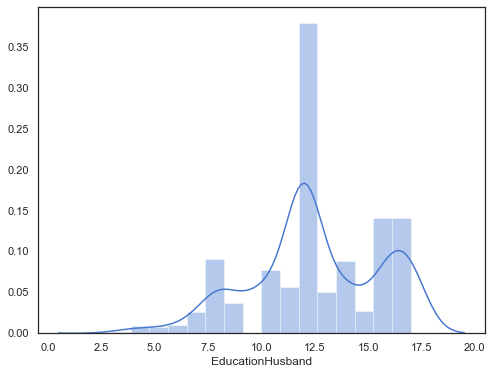

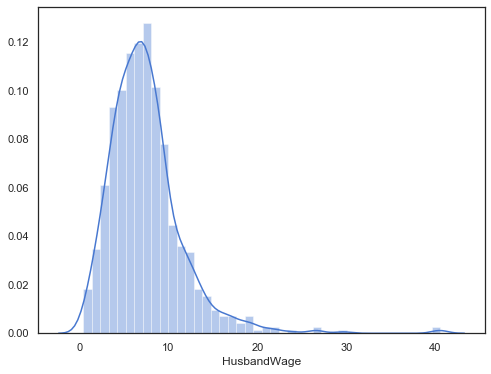

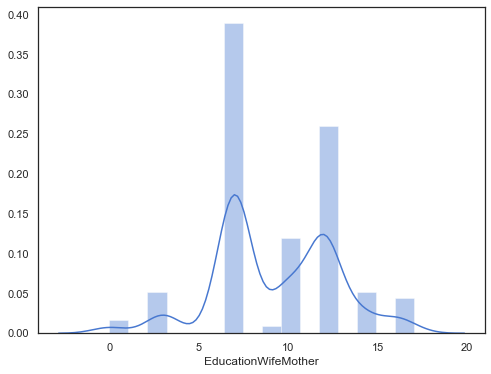

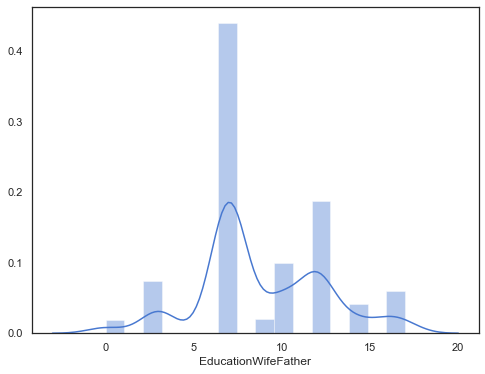

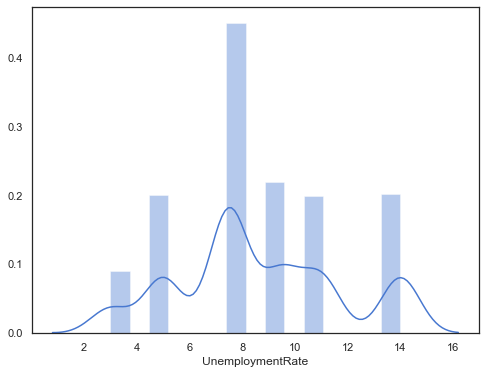

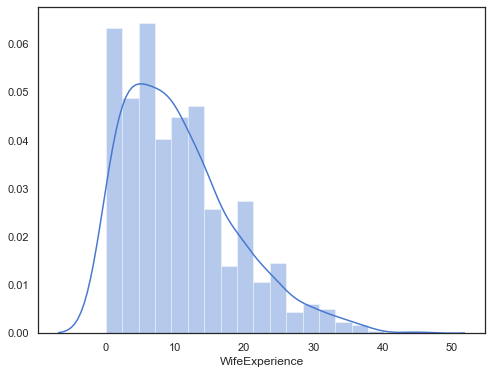

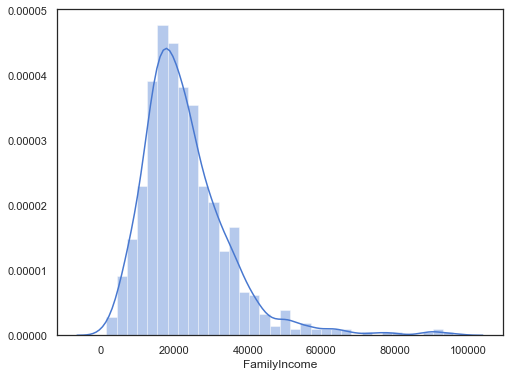

<Figure size 576x432 with 0 Axes>

In [ ]:
for i, col in enumerate (data.columns): 
    plt.figure(i)
    sns.distplot(data[col])
    plt.figure(figsize=(8,6))

Comments from EDA:
1.	There were 753 respondents to the survey.
2.	The survey had 14 questions which are represented by the variables in the data set.
3.	There are no null values in the data set.
4.	From the boxplots we can infer that family income has many outliers however they appear to be valid. Working hours wife and working hours husband too have outliers.
5.	A high standard deviation for wife and husband working hours and family income is also observed.
6.	From distribution plots and histogram we further inferred:
a.	Working hours wife is right skewed and bi-modal
b.	Wife age is bi-modal
c.	Education wife is multi-modal
d.	Wife  hour earnings is right skewed
e.	Wife Wage is right skewed and bi-modal
f.	Working hours husband is normally distributed
g.	Husband age is normally distributed
h.	Education husband is bi-modal and left skewed
i.	Husband wage is right skewed
j.	Education wife mother is bi-modal
k.	Education wife father is bi-modal
l.	Unemployment rate is bi-modal
m.	Wife experience is right skewed
n.	Family income is right skewed


## 2.2 Multicollinearity

VIF Statistics

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(M):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = M.columns
    vif["VIF"] = [variance_inflation_factor(M.values, i) for i in range(M.shape[1])]

    return(vif)

In [ ]:
M = data.iloc[:,:-1]
calc_vif(M)

,variables,VIF
0,WorkingHoursWife,2.989300
1,WifeAge,146.628533
2,EducationWife,56.774943
3,WifeHourEarnings,2.801001
4,WifeWage,3.711610
5,WorkingHoursHusband,15.255274
6,HusbandAge,145.523898
7,EducationHusband,33.269408
8,HusbandWage,5.737404
9,EducationWifeMother,13.786702


Comments on Multicollinearty:

There is evidence of multicollinearity.

From the VIF statistics we see that wife age and wife education; husband age and husband education have very high and high multicollinearity. We may want to remove one of the variables from each pair to predict with a better model.

The variation inflation factor is interpreted via the following thumb rule:
VIF = 1: no multicollinearity
VIF Between 1 and 5: moderately multicollinear
VIF Greater than 5: high multicollinearity


## 2.3 Multiple Linear Regression

In [ ]:
X = data.drop(labels='FamilyIncome',axis=1)
Y = data['FamilyIncome'].copy()

In [ ]:
X.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7


In [ ]:
Y.head()

0    16310
1    21800
2    21040
3     7300
4    27300
Name: FamilyIncome, dtype: int64

### Assumptions for Linear Regression

Test of assumption 1: The independent variables should not be correlated.

In [ ]:
corr = X.corr()
corr

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
WorkingHoursWife,1.000000,-0.033114,0.105960,0.422944,0.606916,-0.056348,-0.031089,-0.009650,-0.098599,0.057864,0.013671,-0.060290,0.404959
WifeAge,-0.033114,1.000000,-0.120223,-0.034559,-0.058315,-0.084372,0.888138,-0.163049,0.027015,-0.234642,-0.160591,0.077077,0.334016
EducationWife,0.105960,-0.120223,1.000000,0.318378,0.267575,0.078916,-0.133522,0.611954,0.284936,0.435336,0.442458,0.072140,0.066256
WifeHourEarnings,0.422944,-0.034559,0.318378,1.000000,0.651641,-0.059919,-0.031836,0.126224,0.061290,0.090305,0.098477,-0.000128,0.250580
WifeWage,0.606916,-0.058315,0.267575,0.651641,1.000000,-0.070797,-0.055399,0.106967,0.019276,0.085598,0.102772,0.009124,0.341557
WorkingHoursHusband,-0.056348,-0.084372,0.078916,-0.059919,-0.070797,1.000000,-0.095387,0.107845,-0.236021,0.053354,0.050345,-0.155220,-0.099366
HusbandAge,-0.031089,0.888138,-0.133522,-0.031836,-0.055399,-0.095387,1.000000,-0.195323,0.019681,-0.227457,-0.135000,0.053094,0.271910
EducationHusband,-0.009650,-0.163049,0.611954,0.126224,0.106967,0.107845,-0.195323,1.000000,0.394665,0.324475,0.366700,0.055017,-0.036301
HusbandWage,-0.098599,0.027015,0.284936,0.061290,0.019276,-0.236021,0.019681,0.394665,1.000000,0.126736,0.193229,0.157920,-0.103306
EducationWifeMother,0.057864,-0.234642,0.435336,0.090305,0.085598,0.053354,-0.227457,0.324475,0.126736,1.000000,0.573072,0.018402,-0.082179


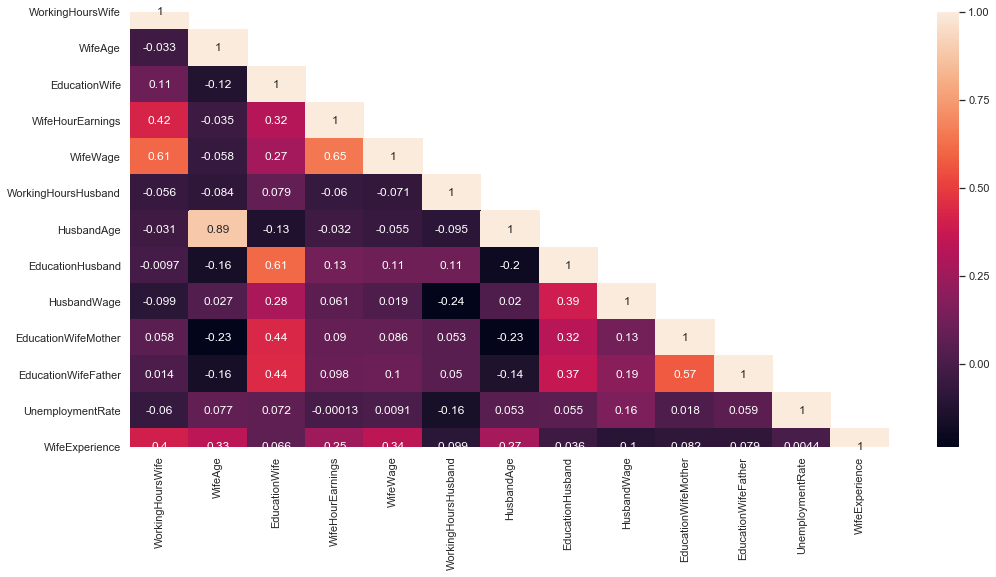

In [ ]:
plt.figure(figsize=(17,8))
sns.heatmap(corr,annot=True,mask=np.triu(corr,+1));

From above correlation matrix and heatmap we can infer that there is some correlation between the independent variables and they may be linearly related.

Test of assumption 2: The dependent variables should be linearly related with the coefficients.

In [ ]:
X_1 =sm.add_constant(X)

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
model = sm.OLS(Y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sat, 18 Jul 2020   Prob (F-statistic):          8.01e-186
Time:                        17:03:43   Log-Likelihood:                -7692.7
No. Observations:                 753   AIC:                         1.541e+04
Df Residuals:                     739   BIC:                         1.548e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.224e+04   2455.663     -9.057      0.000   -2.71e+04   -1.74e+04
WorkingHoursWife        2.7718      0.372      7.456      0.000       2.042       3.502
WifeAge               134.1663     68.226      1.967      0.050       0.227     268.106
EducationWife         375.2334    153.202      2.449      0.015      74.471     675.995
WifeHourEarnings      310.9829    101.621      3.060      0.002     111.482     510.484
WifeWage              277.4616    154.003      1.802      0.072     -24.875     579.798
WorkingHoursHusband     6.7790      0.441     15.356      0.000       5.912       7.646
HusbandAge             27.4612     66.582      0.412      0.680    -103.251     158.174
EducationHusband      -75.3354    110.423     -0.682      0.495    -292.115     141.444
HusbandWage          2286.1687     67.840     33.699      0.000    2152.986    2419.351
EducationWifeMother    31.6954     92.865      0.341      0.733    -150.616     214.007
EducationWifeFather    24.6254     87.378      0.282      0.778    -146.913     196.164
UnemploymentRate      -50.9882     80.405     -0.634      0.526    -208.838     106.862
WifeExperience       -107.5475     36.789     -2.923      0.004    -179.771     -35.323
==============================================================================
Omnibus:                      404.335   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5410.657
Skew:                           2.107   Prob(JB):                         0.00
Kurtosis:                      15.438   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print('R squared =',model.rsquared)

R squared = 0.7050868822822953


Since the R squared value is less than 0.75 we will need to rethink the efficacy of this model. Though the value of Prob (F-statistic) is less than alpha suggesting existence of some linear model.

In [ ]:
ypred = model.predict(X_1)
print(ypred)

0      19184.922034
1      26443.029416
2      22869.522847
3      10637.964287
4      29825.819372
           ...     
748    29188.139436
749    10267.140030
750     6530.930844
751    29565.525515
752    20397.177280
Length: 753, dtype: float64


In [ ]:
ypred = model.fittedvalues
ypred

0      19184.922034
1      26443.029416
2      22869.522847
3      10637.964287
4      29825.819372
           ...     
748    29188.139436
749    10267.140030
750     6530.930844
751    29565.525515
752    20397.177280
Length: 753, dtype: float64

In [ ]:
meansqerr = (np.sum(np.square(Y - ypred)))/data.shape[0]
meansqerr

43766191.98618459

In [ ]:
LR1 = np.sqrt(meansqerr)

print("The Root Mean Square Error (RMSE) of the model is",LR1)

The Root Mean Square Error (RMSE) of the model is 6615.60216353618


Test of assumption 3: The error terms has a constant variance i.e. they are homoscedastic in nature.

In [ ]:
data_new=pd.read_csv("Income.csv")

In [ ]:
data_new['ypred']=ypred

In [ ]:
data_new['error']=Y-ypred

In [ ]:
data_new.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome,ypred,error
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310,19184.922034,-2874.922034
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800,26443.029416,-4643.029416
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040,22869.522847,-1829.522847
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300,10637.964287,-3337.964287
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300,29825.819372,-2525.819372


We will plot the Residuals (or errors) against the predictor variable values.

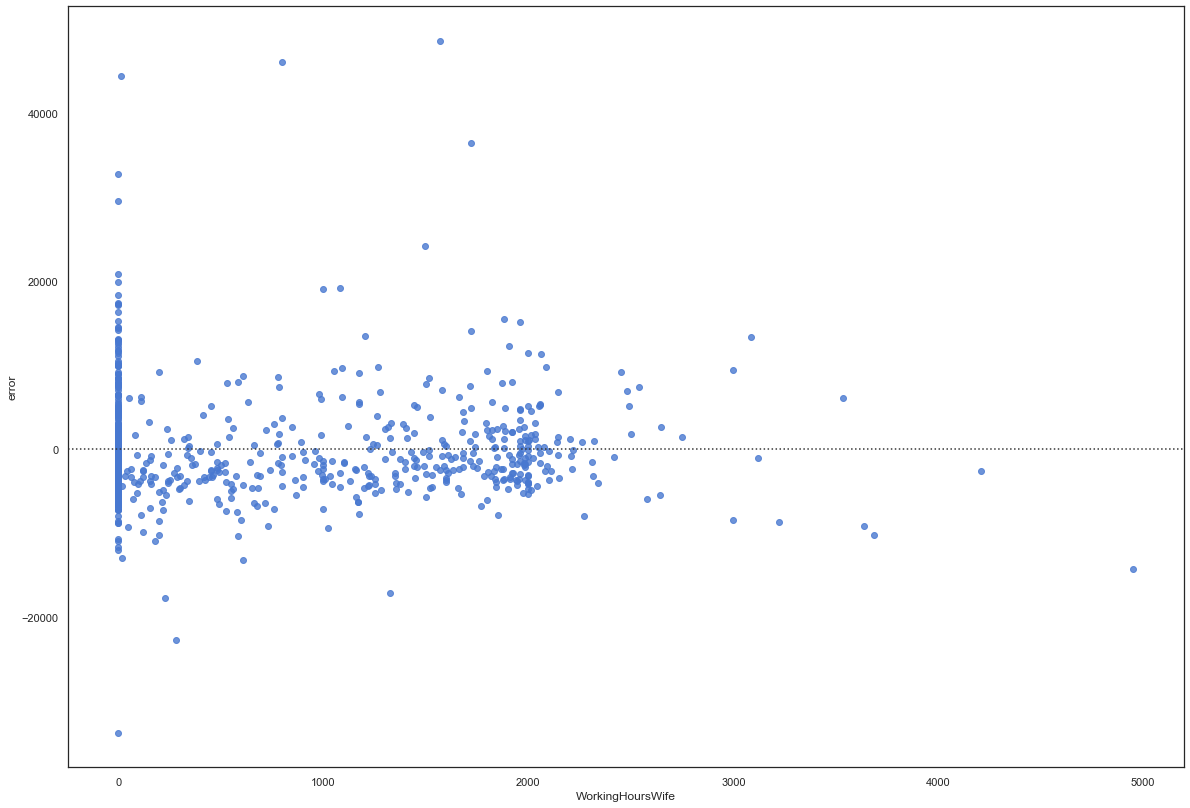

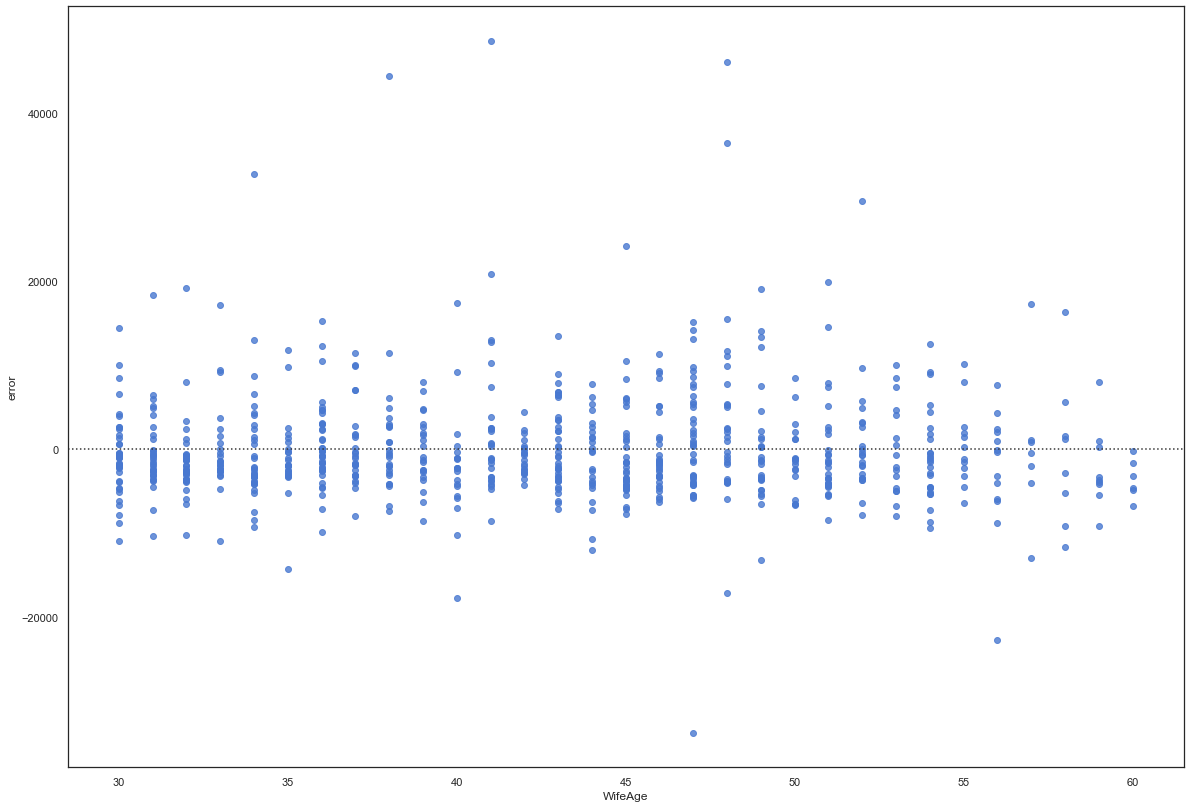

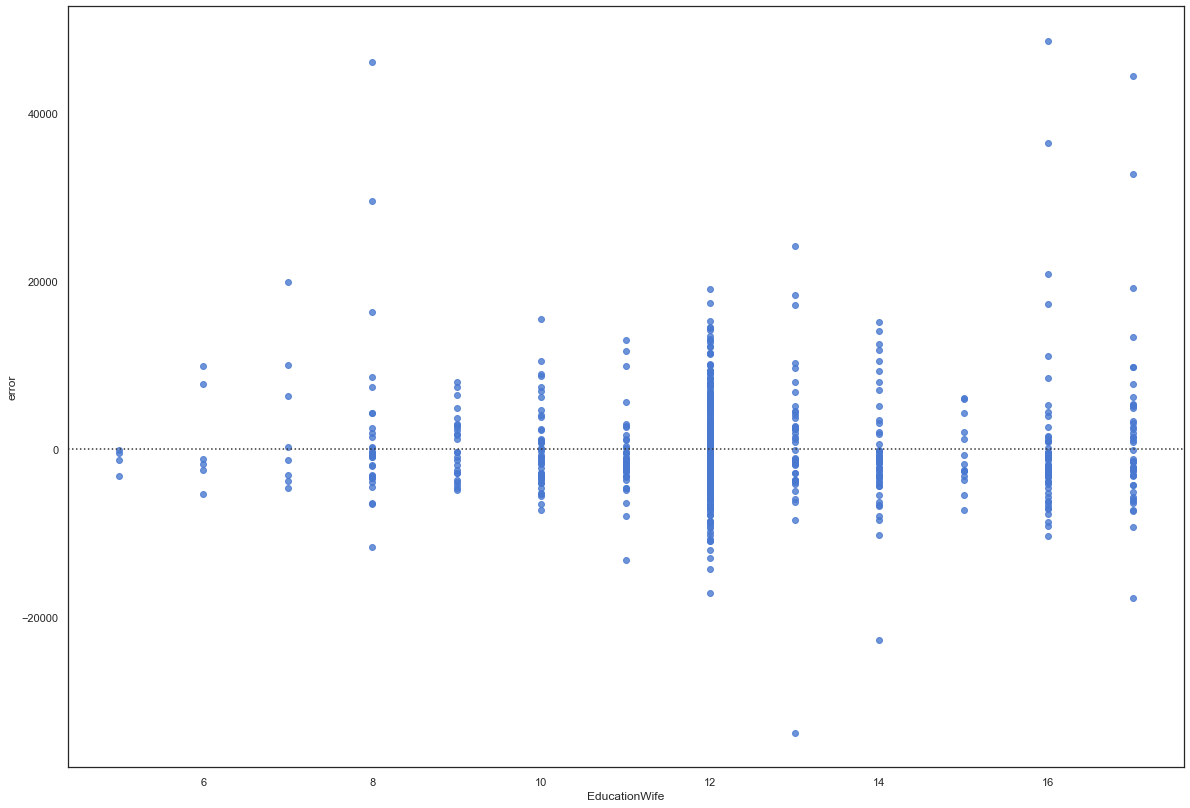

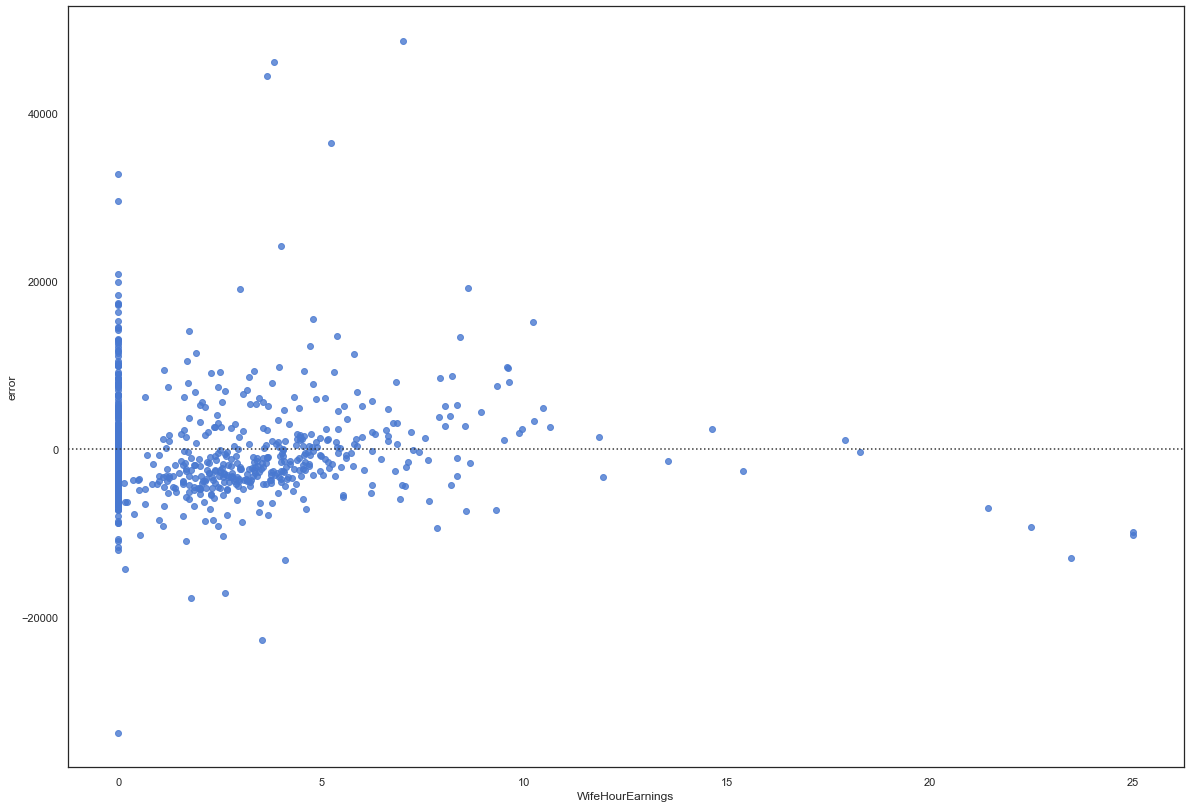

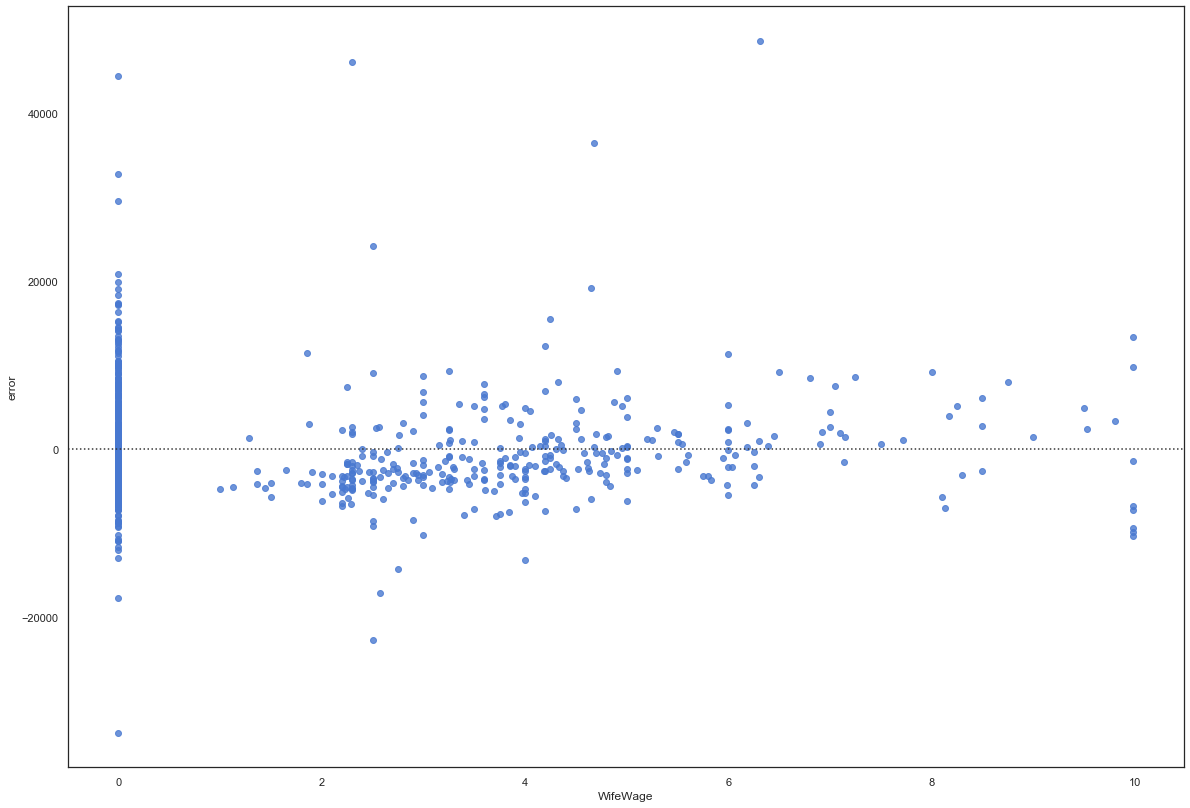

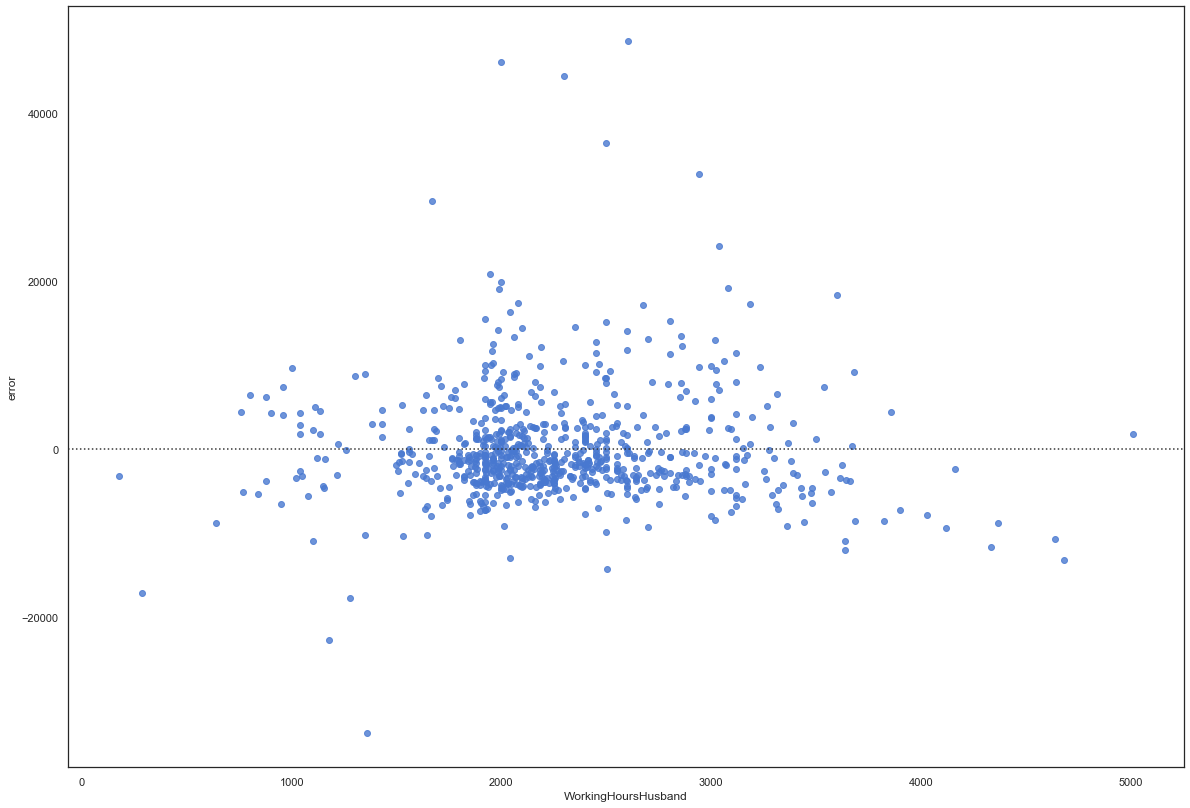

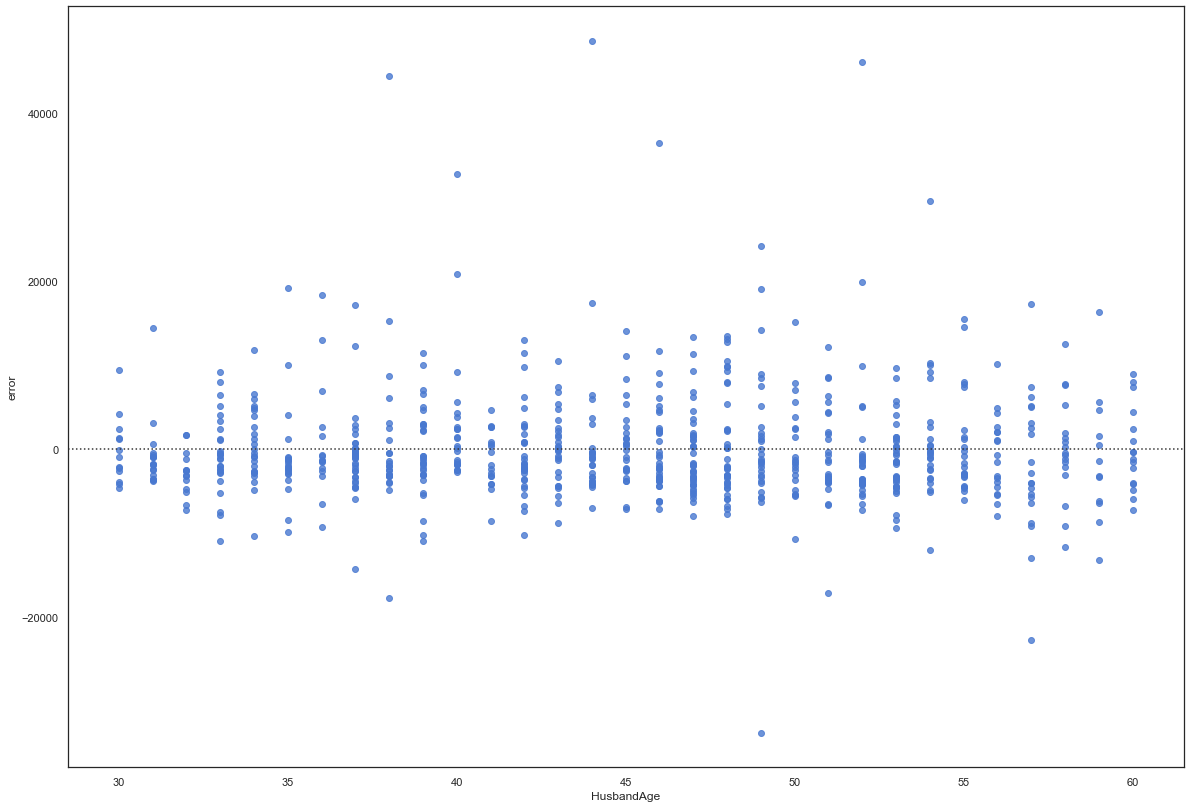

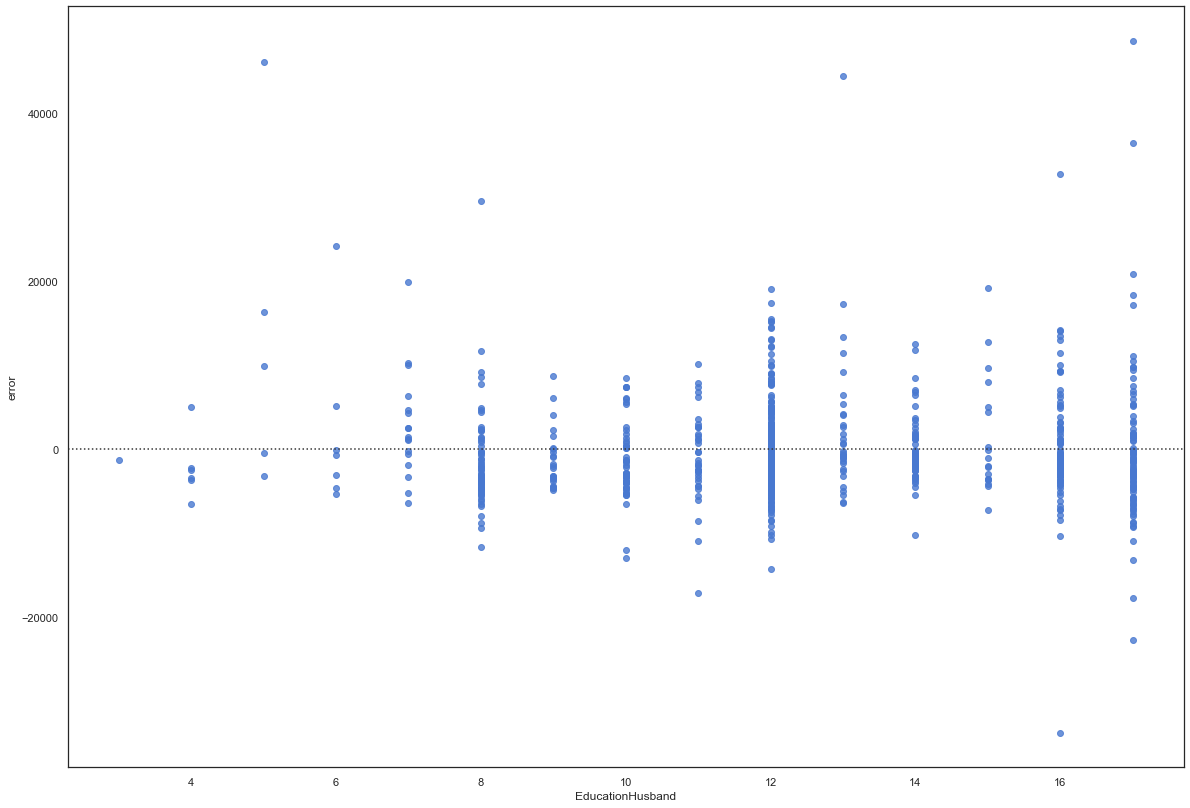

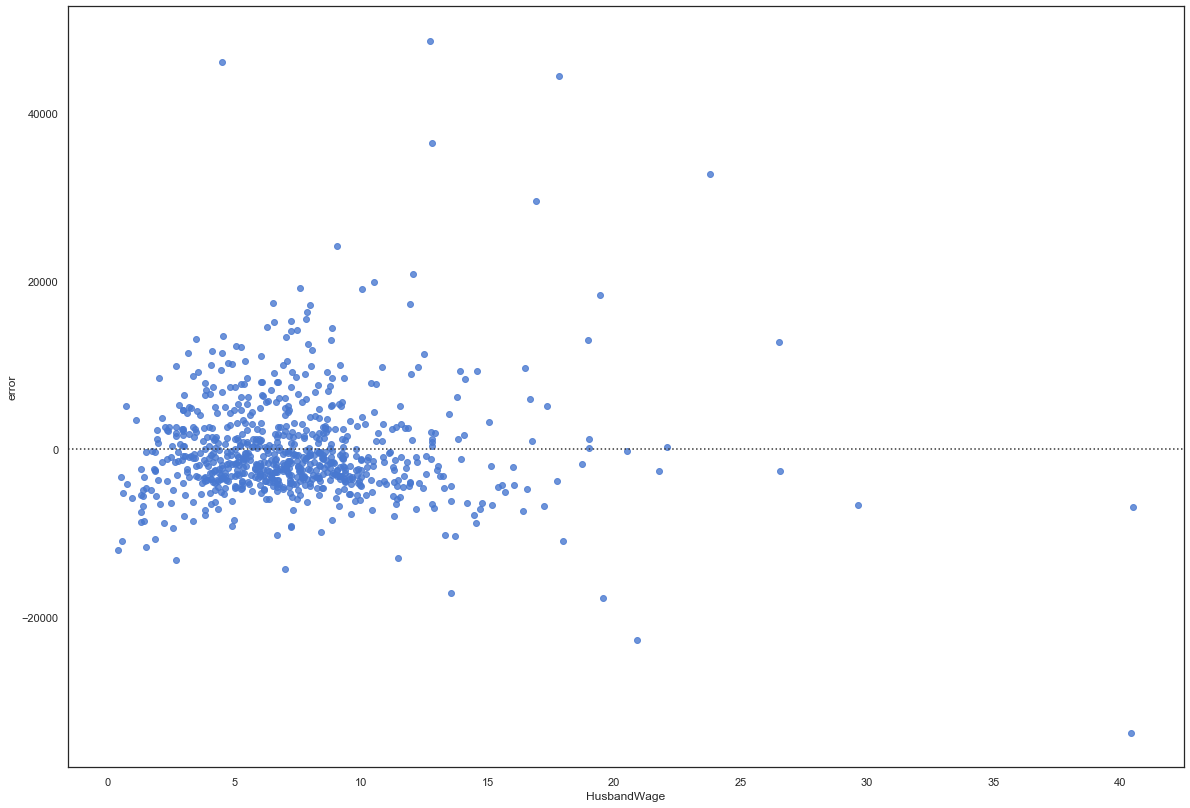

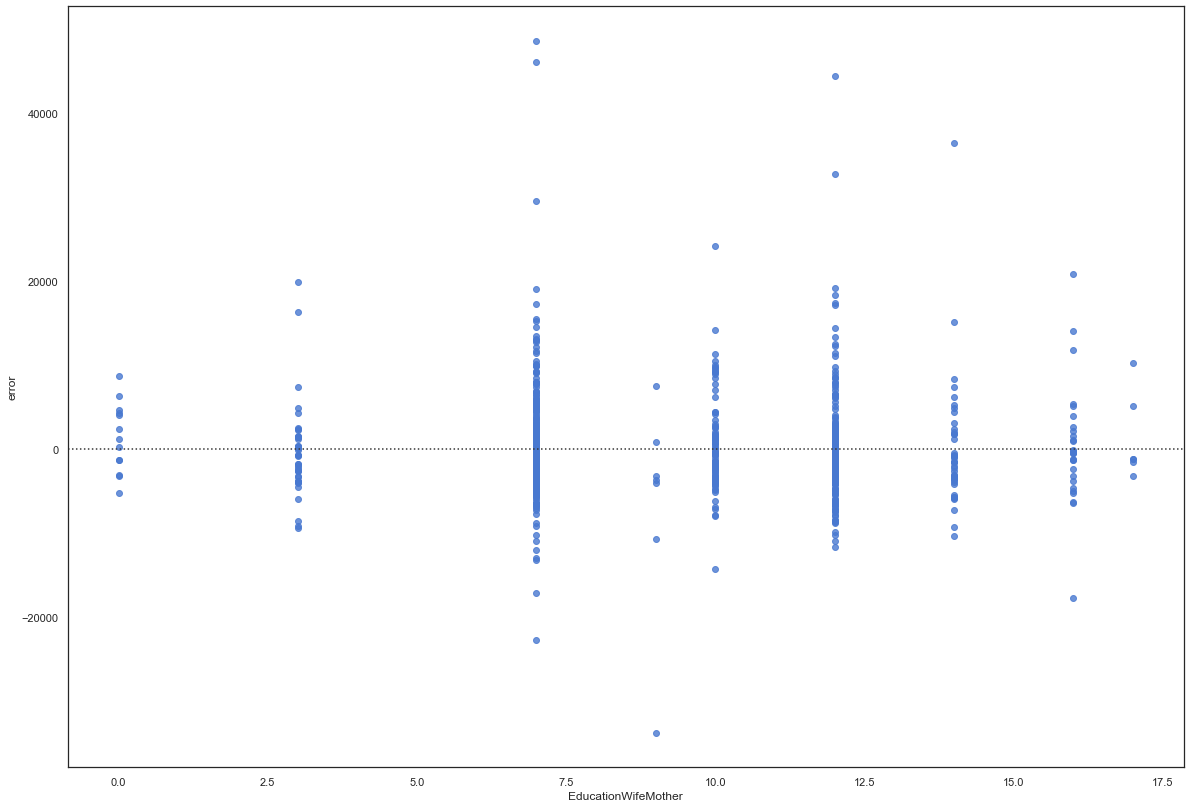

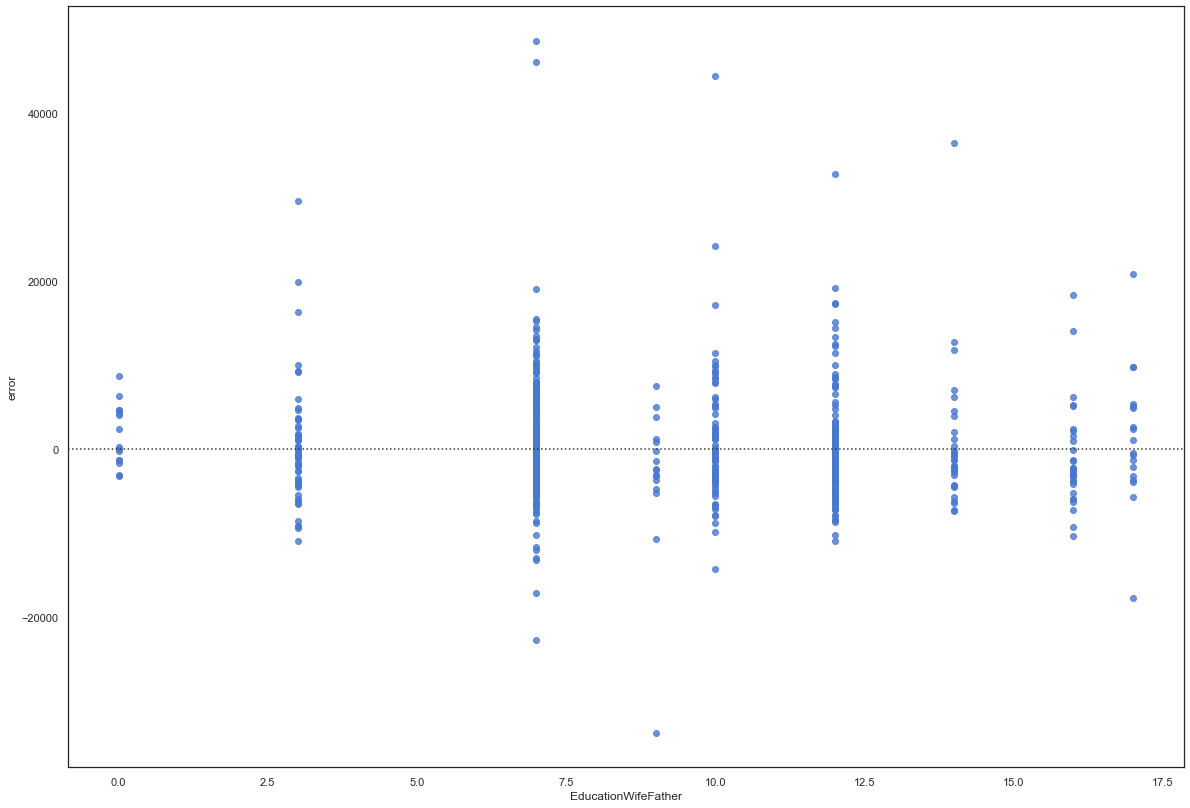

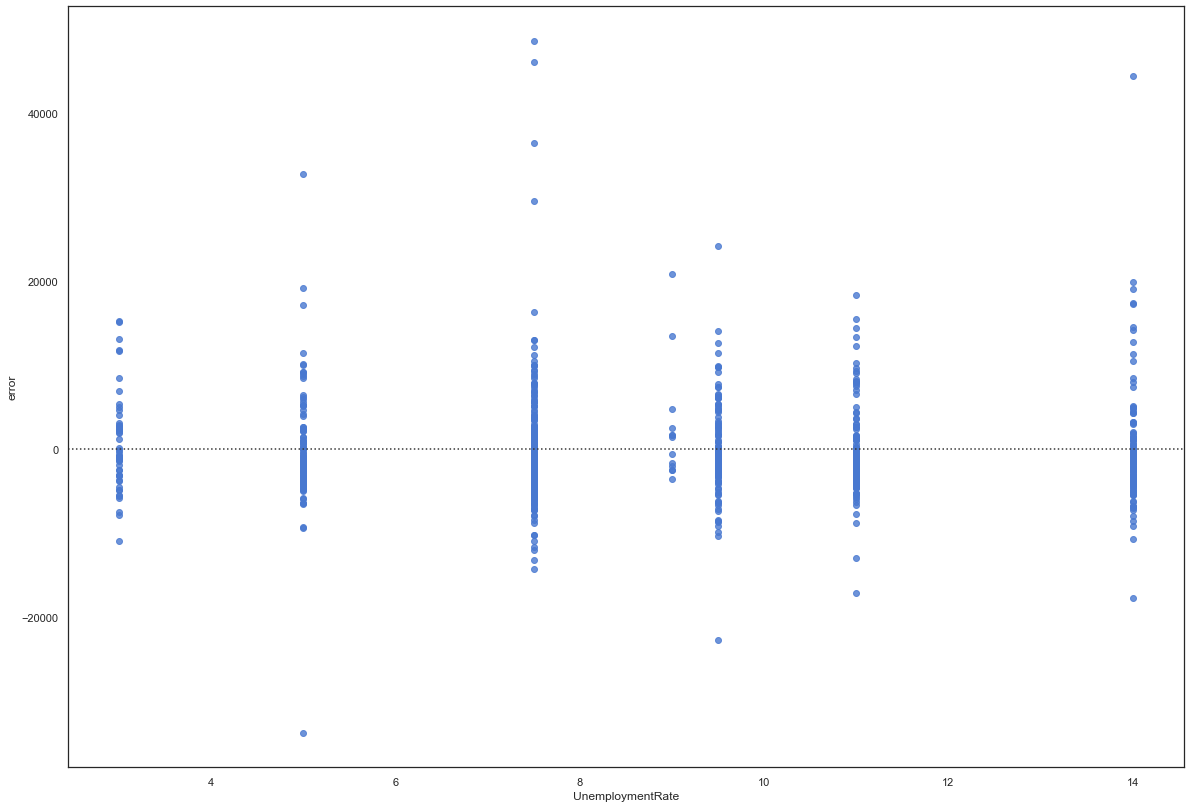

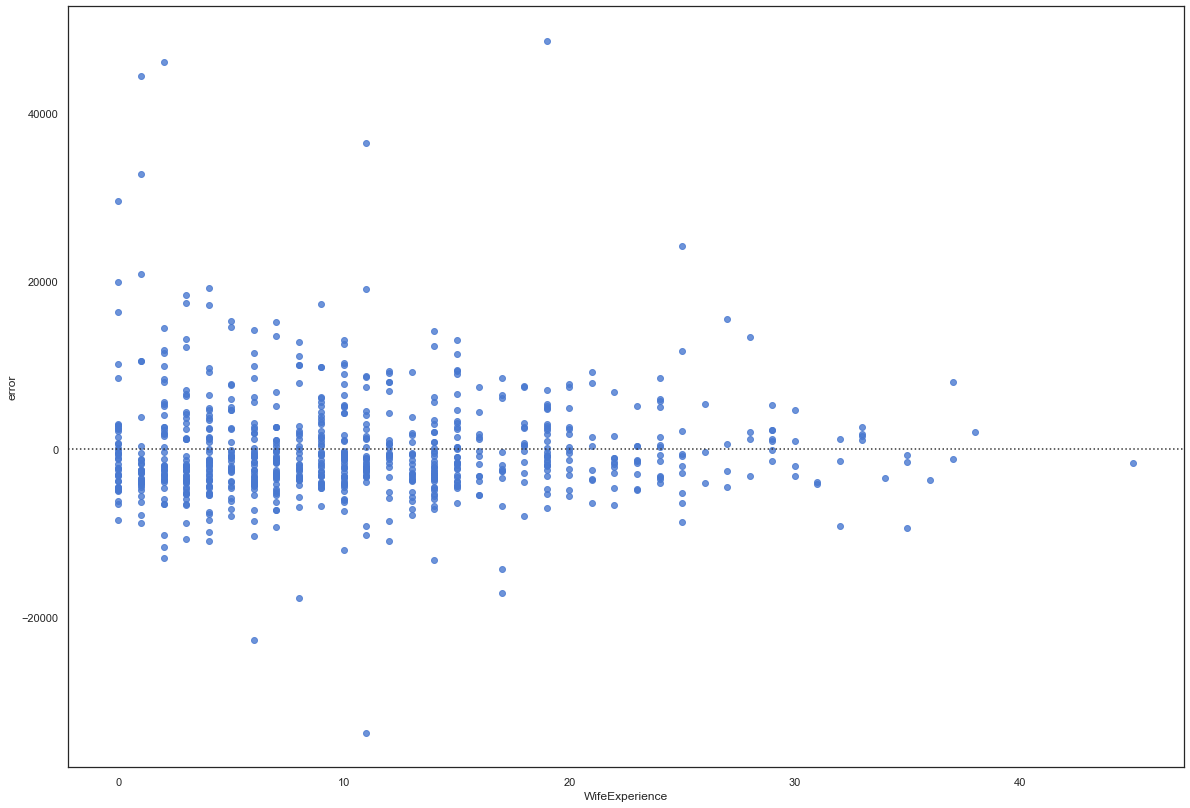

In [ ]:
for names in range(0,len(X.columns)):
    sns.residplot(X.iloc[:,names],data_new['error'])
    plt.show()

The above residual plots do no necessarily follow any particular pattern though they seem to have some kind of pattern.

Test of assumption 4: There should not be any auto-correlation between the error terms.

If the Durbin-Watson test statistic is very close to 2, we can go ahead and say that there is no autocorrelation. From the output of the linear regression model we see that the Durbin-Watson test statistic is close to 2 and thus we can say that this particular assumption of Linear Regression is verified.

In [ ]:
import statsmodels

statsmodels.stats.stattools.durbin_watson(data_new['error'], axis=0)

2.073207063867934

The value for Durbin-Watson test statistic is confirmed from above as well.

Test of assumption 5: The errors are assumed to be normally distributed.

In [ ]:
shapiro(np.abs(data_new['error']))

ShapiroResult(statistic=0.6476627588272095, pvalue=1.1551306366971684e-36)

Since the p-value is less than $\alpha$ (0.05), we can say that the errors are not normally distributed and this particular assumption does not hold true.

QQ Plot:

In [ ]:
res = model.resid

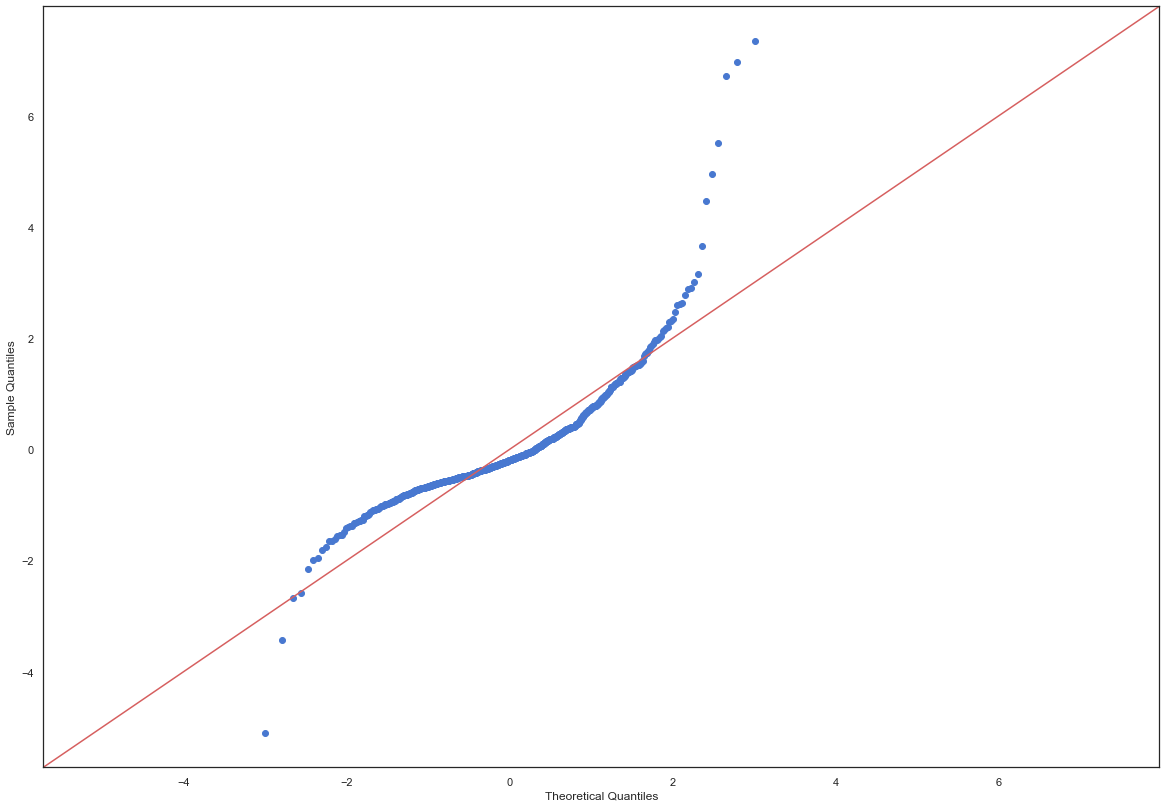

In [ ]:
fig = sm.qqplot(res,fit=True,line='45')
plt.show()

Since the errors are not falling on the diagonal line, we can definitely say that the errors are indeed not normally distributed.

### Comments on model: 

a.	The dependent variable is Family Income which we are trying to predict.

b.	The ordinary least square (OLS) method was used to perform this analysis. This method tries to minimize the errors by minimum sum of square of errors which becomes the basis of creating the best file line.

c.	The number of observations are 753 in the dataset.

d.	Df model provides the number of predictor or independent variables which is 13.

e.	The R-squared value which we get from this model is 0.705 which means that 70.5% variability in the dependent variable is being explained by the independent variables.Since the R-squared value is less than 0.75 we need to rethink the efficacy of this model. It can be said that the selection of independent variables needs to be reassessed.

f.	The Prob (F-statistic) value is 8.01e-186 and is less than α(0.05) which means that there is significant existence of a linear model. This also means that sample is good enough to predict for the population.

g.	The Adjusted R-squared value is 0.700 and is close to the R-squared value thus implying that the sample size is adequate. This statistic has great significance in prediction via linear regression where there are multiple independent variables since it takes care of the correlation of independent variables.

h.	The P-value gives us information on which of the independent variables are affecting the dependent variable and from the model we can say that the following independent variables will affect the target variable, Family income – 
•	Wife wage
•	Husband age
•	Education husband
•	Education wife mother
•	Education wife father
•	Unemployment rate


## 2.4 Principal Component Analysis

Step 1: Scaling

In [ ]:
from scipy.stats import zscore
data_s=X.apply(zscore)
data_s.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262


Step 2: Covariance Matrix Calculation

In [ ]:
cov_mat = np.cov(data_s.T)
print('Covariance Matrix \n%s', cov_mat)

Covariance Matrix 
%s [[ 1.00132979e+00 -3.31582115e-02  1.06101321e-01  4.23506899e-01
   6.07723445e-01 -5.64225183e-02 -3.11300884e-02 -9.66326289e-03
  -9.87300540e-02  5.79406915e-02  1.36890778e-02 -6.03700052e-02
   4.05497226e-01]
 [-3.31582115e-02  1.00132979e+00 -1.20382861e-01 -3.46051004e-02
  -5.83924775e-02 -8.44837698e-02  8.89319009e-01 -1.63266264e-01
   2.70507312e-02 -2.34953587e-01 -1.60804404e-01  7.71793469e-02
   3.34460049e-01]
 [ 1.06101321e-01 -1.20382861e-01  1.00132979e+00  3.18801449e-01
   2.67930359e-01  7.90208661e-02 -1.33699059e-01  6.12767546e-01
   2.85315019e-01  4.35915402e-01  4.43046609e-01  7.22359587e-02
   6.63436673e-02]
 [ 4.23506899e-01 -3.46051004e-02  3.18801449e-01  1.00132979e+00
   6.52507648e-01 -5.99985405e-02 -3.18782667e-02  1.26391585e-01
   6.13711932e-02  9.04253051e-02  9.86077958e-02 -1.27896664e-04
   2.50913296e-01]
 [ 6.07723445e-01 -5.83924775e-02  2.67930359e-01  6.52507648e-01
   1.00132979e+00 -7.08913431e-02 -5.5472531

In [ ]:
data_s.cov()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
WorkingHoursWife,1.001330,-0.033158,0.106101,0.423507,0.607723,-0.056423,-0.031130,-0.009663,-0.098730,0.057941,0.013689,-0.060370,0.405497
WifeAge,-0.033158,1.001330,-0.120383,-0.034605,-0.058392,-0.084484,0.889319,-0.163266,0.027051,-0.234954,-0.160804,0.077179,0.334460
EducationWife,0.106101,-0.120383,1.001330,0.318801,0.267930,0.079021,-0.133699,0.612768,0.285315,0.435915,0.443047,0.072236,0.066344
WifeHourEarnings,0.423507,-0.034605,0.318801,1.001330,0.652508,-0.059999,-0.031878,0.126392,0.061371,0.090425,0.098608,-0.000128,0.250913
WifeWage,0.607723,-0.058392,0.267930,0.652508,1.001330,-0.070891,-0.055473,0.107109,0.019302,0.085712,0.102909,0.009136,0.342011
WorkingHoursHusband,-0.056423,-0.084484,0.079021,-0.059999,-0.070891,1.001330,-0.095514,0.107988,-0.236335,0.053425,0.050412,-0.155426,-0.099498
HusbandAge,-0.031130,0.889319,-0.133699,-0.031878,-0.055473,-0.095514,1.001330,-0.195582,0.019707,-0.227759,-0.135180,0.053164,0.272272
EducationHusband,-0.009663,-0.163266,0.612768,0.126392,0.107109,0.107988,-0.195582,1.001330,0.395190,0.324906,0.367187,0.055090,-0.036349
HusbandWage,-0.098730,0.027051,0.285315,0.061371,0.019302,-0.236335,0.019707,0.395190,1.001330,0.126904,0.193486,0.158130,-0.103444
EducationWifeMother,0.057941,-0.234954,0.435915,0.090425,0.085712,0.053425,-0.227759,0.324906,0.126904,1.001330,0.573834,0.018427,-0.082288


Step 3: Eigen Vector & Eigen Vector Calculation

In [ ]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
print('Eigen Vectors \n', eig_vec)
print('\n Eigen Values \n', eig_val)

Eigen Vectors 
 [[-0.17742383  0.42818966  0.27289732 -0.01800772  0.10248336 -0.04906251
  -0.02140832  0.16921007 -0.5533919  -0.38195272 -0.14860013 -0.43375229
  -0.07761001]
 [ 0.2686461   0.32073721 -0.46948303  0.24081122  0.00652029 -0.01636776
  -0.71604282 -0.12039671 -0.01878517  0.00937483  0.06594523 -0.1174905
   0.02087811]
 [-0.44361296  0.02791376 -0.21775337  0.14759737 -0.16389846  0.10670115
  -0.00704313  0.07993251  0.37441051  0.06785842 -0.68811238 -0.26211575
   0.03935585]
 [-0.2760925   0.38312234  0.13260116 -0.08785453 -0.15014214  0.05824887
  -0.00248872 -0.50545136  0.34121163 -0.48969245  0.16968773  0.24980465
   0.15114727]
 [-0.27877776  0.43697551  0.20093792 -0.09615522 -0.04139521  0.05283352
  -0.01433441 -0.2293794  -0.0947791   0.76645265  0.12449233 -0.00541794
  -0.1114797 ]
 [-0.03355309 -0.13593613  0.16562636  0.65079552 -0.23533967  0.49972219
   0.01506437 -0.13060046 -0.35680902  0.00489237 -0.05394212  0.23643394
   0.14453663]
 [ 0.27

In [ ]:
eig_val, eig_vec = np.linalg.eig(data_s.cov())
print('Eigen Vectors \n', eig_vec)
print('\n Eigen Values \n', eig_val)

Eigen Vectors 
 [[-0.17742383  0.42818966  0.27289732 -0.01800772  0.10248336 -0.04906251
  -0.02140832  0.16921007 -0.5533919  -0.38195272 -0.14860013 -0.43375229
  -0.07761001]
 [ 0.2686461   0.32073721 -0.46948303  0.24081122  0.00652029 -0.01636776
  -0.71604282 -0.12039671 -0.01878517  0.00937483  0.06594523 -0.1174905
   0.02087811]
 [-0.44361296  0.02791376 -0.21775337  0.14759737 -0.16389846  0.10670115
  -0.00704313  0.07993251  0.37441051  0.06785842 -0.68811238 -0.26211575
   0.03935585]
 [-0.2760925   0.38312234  0.13260116 -0.08785453 -0.15014214  0.05824887
  -0.00248872 -0.50545136  0.34121163 -0.48969245  0.16968773  0.24980465
   0.15114727]
 [-0.27877776  0.43697551  0.20093792 -0.09615522 -0.04139521  0.05283352
  -0.01433441 -0.2293794  -0.0947791   0.76645265  0.12449233 -0.00541794
  -0.1114797 ]
 [-0.03355309 -0.13593613  0.16562636  0.65079552 -0.23533967  0.49972219
   0.01506437 -0.13060046 -0.35680902  0.00489237 -0.05394212  0.23643394
   0.14453663]
 [ 0.27

Step 4: Variance and Cumulative Variance Calculation

In [ ]:
total = sum(eig_val)
va_ex = [( i /total ) * 100 for i in sorted(eig_val, reverse=True)]
print('The variance explained by each of eigen values in order is ',va_ex)

The variance explained by each of eigen values in order is  [22.909952727776105, 18.51644154604994, 13.717349758794766, 9.490342942168759, 7.142244968694188, 6.60615729749124, 5.306910765021304, 4.1489013600325295, 3.3926663131857535, 3.227152513087386, 2.494676606741436, 2.227146383598737, 0.8200568173578593]


In [ ]:
cu_va_ex = np.cumsum(va_ex)
print("Cumulative Variance Explained = ", cu_va_ex)

Cumulative Variance Explained =  [ 22.90995273  41.42639427  55.14374403  64.63408697  71.77633194
  78.38248924  83.68940001  87.83830137  91.23096768  94.45812019
  96.9527968   99.17994318 100.        ]


Step 5: Variance vs Principal Components

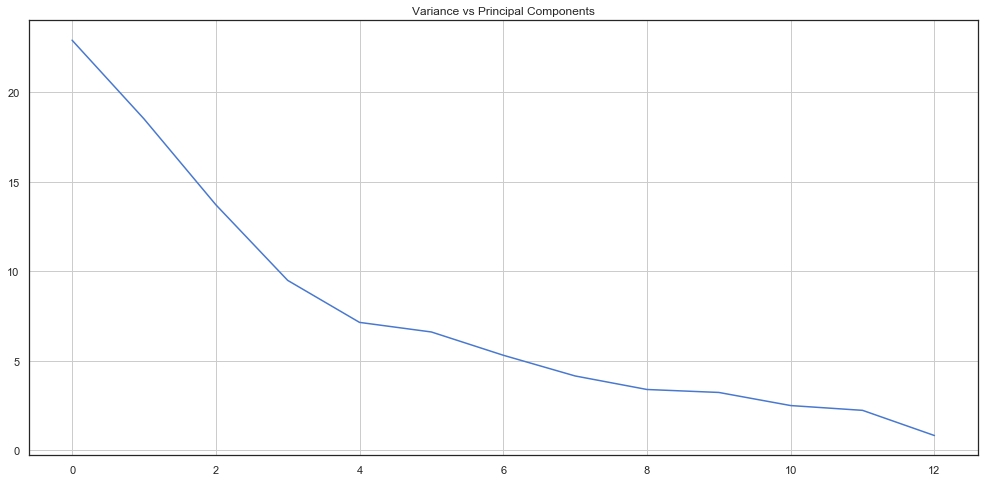

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(va_ex)
plt.title('Variance vs Principal Components')
plt.grid()

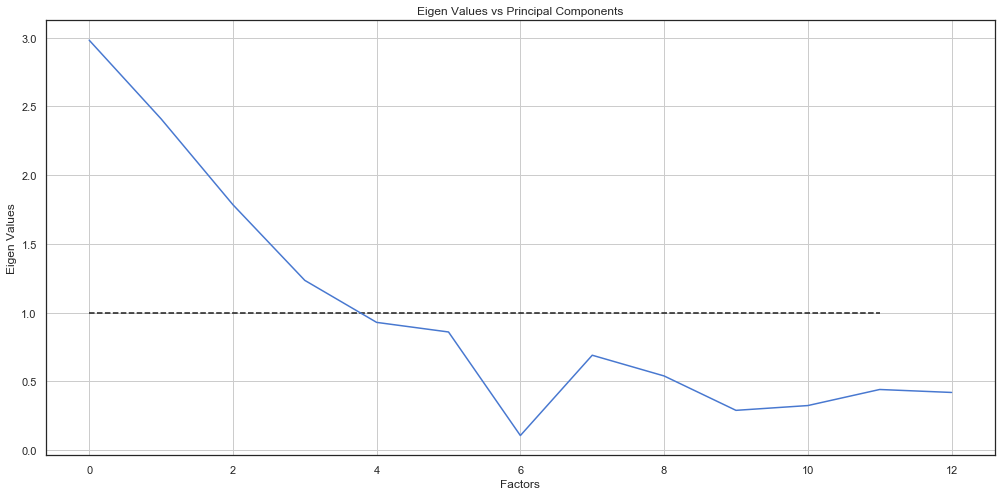

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(eig_val)
plt.grid()
plt.ylabel('Eigen Values')
plt.xlabel('Factors')
plt.hlines(y=1,xmin=0,xmax=11,linestyles='dashed')
plt.title('Eigen Values vs Principal Components');

The above plots and eigen values show that the number of components that should be taken is 4 and if we take 4 components the total amount of variance explained is 64.6%.

Variance explained by each eigen value and cumulative variance explained:

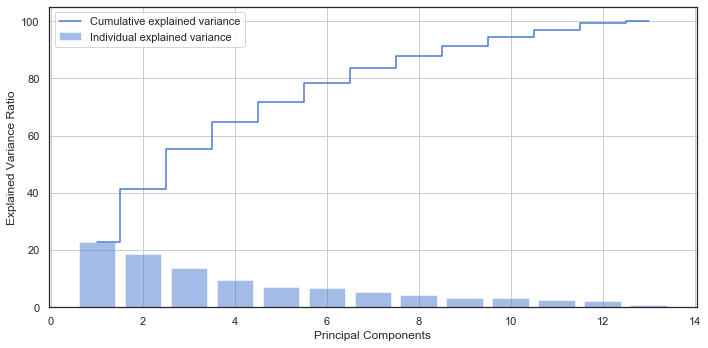

In [ ]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_val.size + 1), va_ex, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_val.size + 1), cu_va_ex, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.grid()
plt.show()

Scree Plot:

In [ ]:
from statsmodels.multivariate.factor import Factor

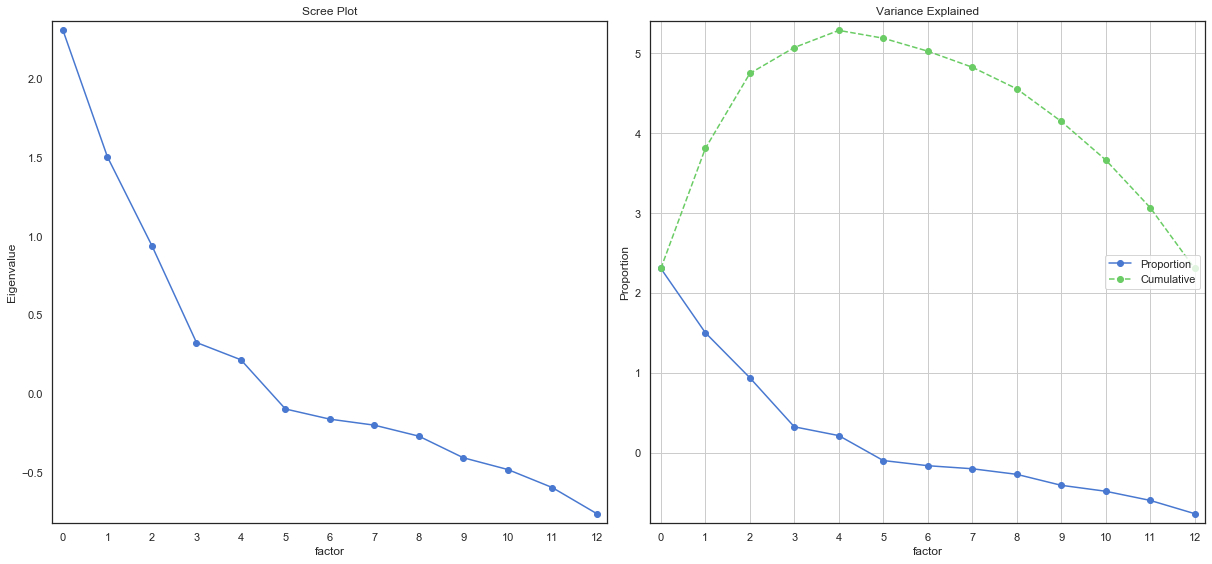

In [ ]:
rcParams['figure.figsize'] = 17, 8

model=Factor(X).fit()
model.plot_scree()
plt.grid()
plt.show()

As per elbow rule, the optimal number of principal components can be taken as 4.

In [ ]:
from statsmodels.multivariate.pca import PCA

In [ ]:
pc = PCA(X, 
         ncomp=4,
         standardize=True,  
         normalize=True,    
         missing=None,method='eig')

In [ ]:
data_comp = pc.loadings.T
data_comp

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
comp_0,-0.177424,0.268646,-0.443613,-0.276092,-0.278778,-0.033553,0.271126,-0.390302,-0.196630,-0.375744,-0.371109,-0.032692,-0.002222
comp_1,0.428190,0.320737,0.027914,0.383122,0.436976,-0.135936,0.309796,-0.101359,-0.056855,-0.132936,-0.113332,0.014807,0.465379
comp_2,0.272897,-0.469483,-0.217753,0.132601,0.200938,0.165626,-0.459676,-0.252043,-0.418032,-0.099204,-0.199590,-0.268341,-0.032294
comp_3,-0.018008,0.240811,0.147597,-0.087855,-0.096155,0.650796,0.240164,0.079821,-0.375879,0.204903,0.204439,-0.417127,0.127637


In [ ]:
X_red = pc.factors
X_red.head()

,comp_0,comp_1,comp_2,comp_3
0,-0.019107,-0.001738,0.067640,0.020916
1,-0.005178,-0.015930,0.058042,-0.054033
2,-0.019851,0.019512,0.065041,0.041485
3,0.022086,-0.000003,0.028621,0.000746
4,-0.055158,-0.009212,0.028315,-0.033167


Correlation Matrix with reduced dimensions:

In [ ]:
X_red_corr = X_red.corr()
X_red_corr

,comp_0,comp_1,comp_2,comp_3
comp_0,1.000000e+00,7.516774e-16,-2.672558e-17,2.993482e-16
comp_1,7.516774e-16,1.000000e+00,-2.206026e-15,6.552918e-16
comp_2,-2.672558e-17,-2.206026e-15,1.000000e+00,3.442071e-16
comp_3,2.993482e-16,6.552918e-16,3.442071e-16,1.000000e+00


Correlation Matrix Heat Map:

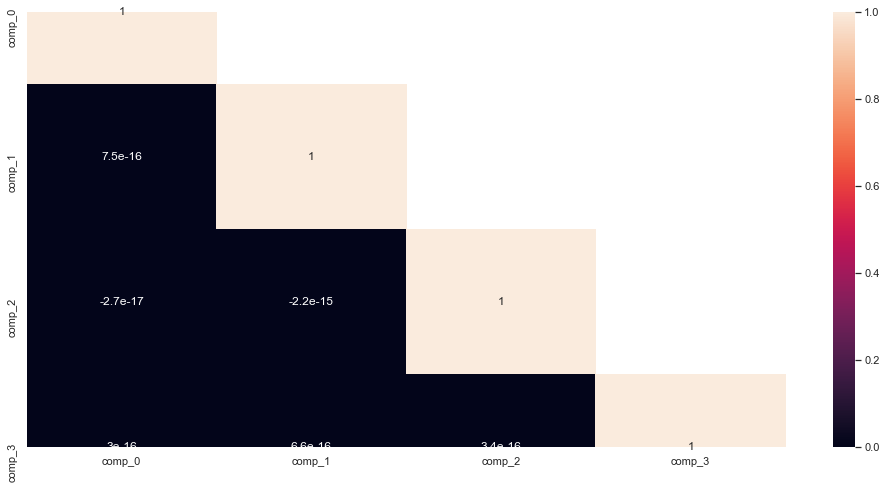

In [ ]:
sns.heatmap(X_red_corr,annot=True,mask=np.triu(X_red_corr,+1));

We see reduced multicollienarity post PCA

## 2.5 Multiple Linear Regression post PCA

In [ ]:
X_PCA=sm.add_constant(X_red)

In [ ]:
model_PCA = sm.OLS(Y,X_PCA).fit()
model_PCA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     81.43
Date:                Sat, 18 Jul 2020   Prob (F-statistic):           2.21e-57
Time:                        17:07:45   Log-Likelihood:                -8016.4
No. Observations:                 753   AIC:                         1.604e+04
Df Residuals:                     748   BIC:                         1.607e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.308e+04    371.773     62.083      0.000    2.24e+04    2.38e+04
comp_0      -1.39e+05   1.02e+04    -13.623      0.000   -1.59e+05   -1.19e+05
comp_1      2.755e+04   1.02e+04      2.701      0.007    7523.634    4.76e+04
comp_2     -1.151e+05   1.02e+04    -11.283      0.000   -1.35e+05   -9.51e+04
comp_3     -2.398e+04   1.02e+04     -2.350      0.019    -4.4e+04   -3948.046
==============================================================================
Omnibus:                      322.878   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1919.314
Skew:                           1.848   Prob(JB):                         0.00
Kurtosis:                       9.893   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print('R squared =',model_PCA.rsquared)

R squared = 0.3033546662855403


In [ ]:
y_pred_PCA = model_PCA.predict(X_PCA)
print(y_pred_PCA)

0      17400.591068
1      17975.478480
2      17895.451842
3      16698.576800
4      28028.291760
           ...     
748    24994.279484
749    20626.238850
750    15201.323832
751    29722.579898
752    16414.324279
Length: 753, dtype: float64


In [ ]:
y_pred_PCA = model_PCA.fittedvalues
print(y_pred_PCA)

0      17400.591068
1      17975.478480
2      17895.451842
3      16698.576800
4      28028.291760
           ...     
748    24994.279484
749    20626.238850
750    15201.323832
751    29722.579898
752    16414.324279
Length: 753, dtype: float64


In [ ]:
meansqerr_PCA = (np.sum(np.square(Y - y_pred_PCA)))/data.shape[0]
meansqerr_PCA

103384731.26452006

In [ ]:
LR_PCA=np.sqrt(meansqerr_PCA)
print("The Root Mean Square Error (RMSE) of the model whose predictor variables have been reduced by PCA is",LR_PCA)

The Root Mean Square Error (RMSE) of the model whose predictor variables have been reduced by PCA is 10167.828247198124


## 2.6 Post PCA comments on model:

a.	The R-squared value of model whose predictor variables have been reduced via PCA is 0.303 and the corresponding Adjusted R-squared value is 0.300. This means that only 30% variability in the dependent variable is being explained by the independent variables. This value of R-squared and Adjusted R squared is less than the benchmark of 0.75 and thus we can say that the model built post PCA is not good and there is need of rethink on the model.

b.	The P-values obtained for each independent variable or components post PCA are very low (less than 0.05) suggesting these set of components will not be able to predict the dependent variable accurately. None of the components are affecting the dependent variable, Family income.


## 2.7 Business Implication & Interpretation of models:

Interpretations:

a.	The R squared and Adjusted R squared values with all the predictor variables are 0.705 and 0.700 respectively which means around 70% variability in the target variable is being explained by the predictor variables. The same value in case where predictor variables have been reduced via PCA are 0.303 and 0.300 respectively. Only 30% variability in the target variable is being explained by the predictor variables after PCA. This suggests that it is better to build the model without going for PCA.

b.	Also, the Root Mean Square Error will all predictor variables is 6615.60216353618 while the same for the case in which where predictor variables have been reduced via PCA is 10167.828247198124. This also indicates that it better to proceed with model without going for PCA.

c.	Since both before and post PCA, the value of R squared and Adjusted R squared is less than 0.75 we should look for a better model to predict family income accurately.

d.	There might be a case for missing predictor variables which may be added to construct a good model to predict the family income correctly.

e.	From the models built we can say that probably the right set of independent variables were not chosen to predict the dependent variable.

Business Implications:

a.	The company should aim to conduct the survey with more questions so that more data and thus more predictor variables may be gathered to build a good model and thus predict the family income accurately.

b.	The company should aim to conduct the survey with questions which will entail better understanding for the respondents of the questions and thus better response.

c.	The company might want to conduct survey with target respondents who are more likely to provide correct responses.

d.	The company might want to change the selection of questions in the survey and chose questions which have a higher probability of predicting the family income.


# END